In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
combined_data = pd.read_csv('./Datasets/Data_Combinada.csv')
combined_data.head()

/tmp/ipykernel_47852/2582469843.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv('./Datasets/Data_Combinada.csv')


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,numero_pasajeros,fugado
0,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,...,De 30 a 34 años,M,NaN,NaN,"443359,226","4472082,272",0.0,0.0,2,No
1,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,...,De 45 a 49 años,H,NaN,NaN,"443359,226","4472082,272",0.0,0.0,2,No
2,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,...,De 30 a 34 años,H,NaN,NaN,"441155,351","4474129,588",1.0,0.0,3,No
3,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,...,De 35 a 39 años,M,NaN,NaN,"441155,351","4474129,588",0.0,0.0,3,No
4,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3.0,RETIRO,Colisión fronto-lateral,NaN,Turismo,...,De 40 a 44 años,H,NaN,NaN,"441155,351","4474129,588",0.0,0.0,3,No


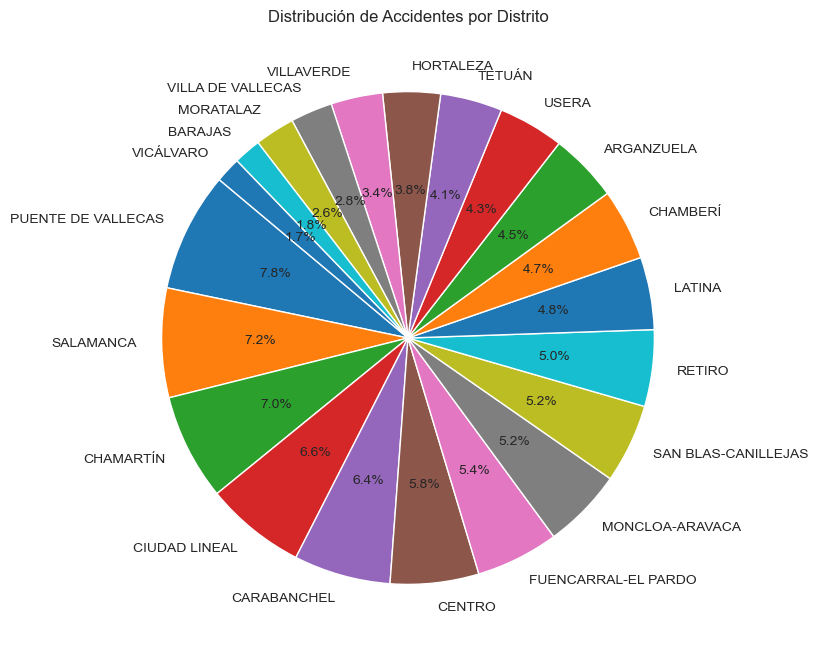

In [3]:
# Creando un gráfico de pastel para mostrar la distribución de accidentes por distrito
distrito_counts = combined_data['distrito'].value_counts()

plt.figure(figsize=(12, 8))
distrito_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Accidentes por Distrito')
plt.ylabel('')  # Eliminando la etiqueta del eje y
plt.show()


In [4]:
#Crear el df date_ocurrency para saber las ocurrencias por fecha
date_ocurrency = combined_data.groupby('fecha').size().reset_index(name='ocurrencia')
date_ocurrency.sort_values(by='ocurrencia', ascending=False, inplace = True)
date_ocurrency.head()

,fecha,ocurrencia
358,18/11/2022,207
319,16/12/2022,207
142,08/02/2022,206
25,02/03/2023,205
465,24/03/2023,202


Creamos un gráfico de lineas de las ocurrencias agrupadas por mes del año para facilitar la visualizacion de los datos y sacar conclusiones a traves de este

In [5]:
# Ordenar el DataFrame por fecha de forma ascendente
date_ocurrency['fecha'] = pd.to_datetime(date_ocurrency['fecha'], format='%d/%m/%Y')
date_ocurrency.sort_values(by='fecha', ascending=True, inplace=True)

# Agrupar por meses del año
date_ocurrency['year_month'] = date_ocurrency['fecha'].dt.strftime('%Y-%m')
monthly_ocurrency = date_ocurrency.groupby('year_month').sum()['ocurrencia'].reset_index()

# Generar el gráfico de líneas agrupado por meses
plt.figure(figsize=(15, 7))
plt.plot(monthly_ocurrency['year_month'], monthly_ocurrency['ocurrencia'], marker='o', linestyle='-', color='b')
plt.title('Ocurrencia de Accidentes por Mes')
plt.xlabel('Mes del Año')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

TypeError: datetime64 type does not support sum operations

El gráfico muestra una fluctuación en la ocurrencia de accidentes mes a mes, con ciertos periodos evidenciando picos elevados. Esta variabilidad puede estar influenciada por una serie de factores, como condiciones climáticas, festividades, o eventos locales. Distinguir los meses con alta ocurrencia de accidentes es crucial para tomar medidas preventivas y mejorar la seguridad vial.

Entender las tendencias y patrones en este gráfico nos va a permitir anticipar y prepararnos mejor para futuros escenarios. Al cruzar estos datos con otros factores relevantes, se podrían identificar causas específicas detrás de los incrementos y descensos en las ocurrencias y, por lo tanto, desarrollar soluciones más efectivas.

### Accidentes por mes sobrepuesto
Para obtener una mejor visualización sobreponemos los datos de ambos años para observar si los mismos han fluctuado

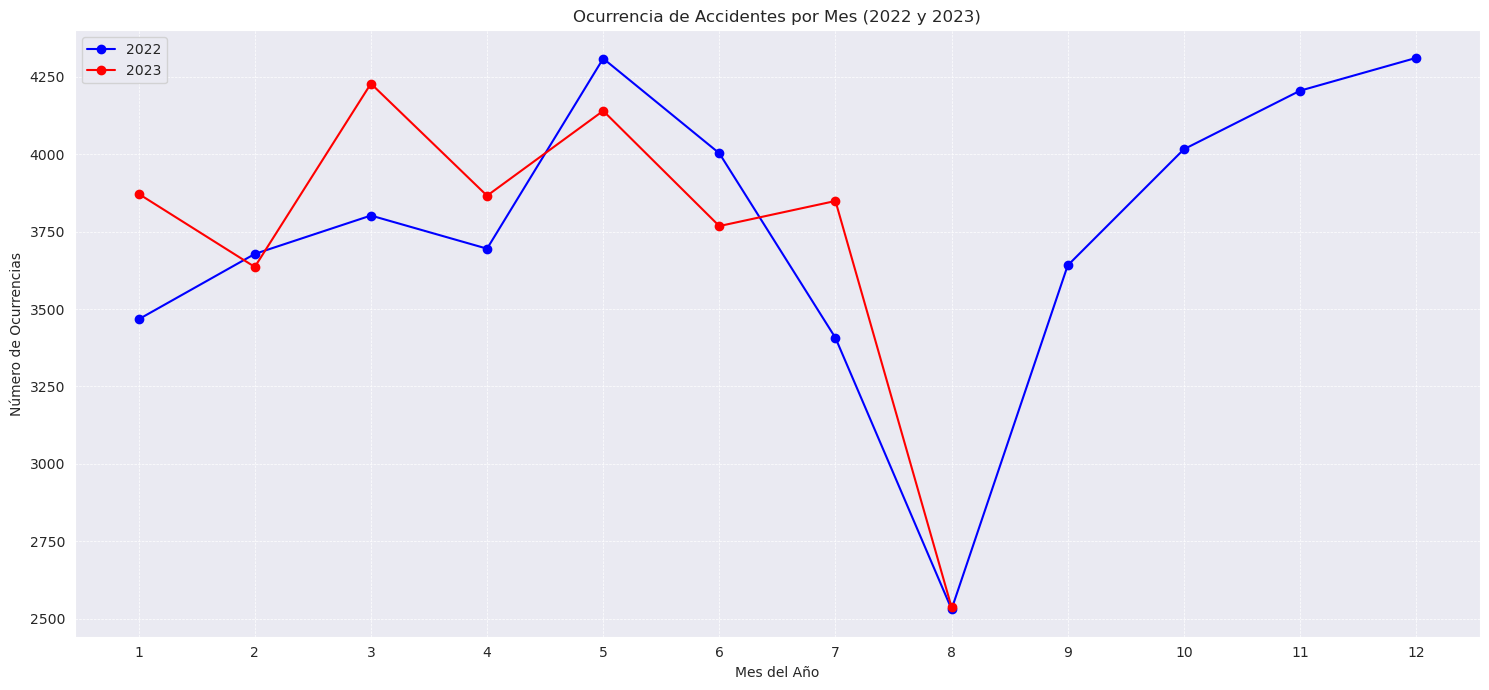

In [13]:
# Convertir la columna 'fecha' al formato de fecha y extraer el año y el mes
combined_data['fecha'] = pd.to_datetime(combined_data['fecha'], format='%d/%m/%Y')
combined_data['year'] = combined_data['fecha'].dt.year
combined_data['month'] = combined_data['fecha'].dt.month
# Agrupar los datos por año y mes, contando las ocurrencias
monthly_ocurrency = combined_data.groupby(['year', 'month']).size().reset_index(name='ocurrencia')

# Separar los datos por año para el gráfico
ocurrency_2022 = monthly_ocurrency[monthly_ocurrency['year'] == 2022]
ocurrency_2023 = monthly_ocurrency[monthly_ocurrency['year'] == 2023]

# Generar el gráfico de líneas
plt.figure(figsize=(15, 7))
plt.plot(ocurrency_2022['month'], ocurrency_2022['ocurrencia'], marker='o', linestyle='-', color='b', label='2022')
plt.plot(ocurrency_2023['month'], ocurrency_2023['ocurrencia'], marker='o', linestyle='-', color='r', label='2023')
plt.title('Ocurrencia de Accidentes por Mes (2022 y 2023)')
plt.xlabel('Mes del Año')
plt.ylabel('Número de Ocurrencias')
plt.xticks(range(1, 13))  # Asegurar que se muestran todos los meses
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## Siguiendo con el análisis exploratorio contamos por distrito la cantidad de ocurrencias por mes y año

In [14]:
# Extrayendo año y mes de la columna 'fecha' y creando una nueva columna 'year_month' sin modificar el dataframe original
year_month = pd.to_datetime(combined_data['fecha'], dayfirst=True).dt.to_period('M')

# Agrupando por 'year_month' y 'distrito' para contar las ocurrencias
grouped_data = combined_data.groupby([year_month, 'distrito']).size().unstack().fillna(0)

grouped_data.head()

distrito,ARGANZUELA,BARAJAS,CARABANCHEL,CENTRO,CHAMARTÍN,CHAMBERÍ,CIUDAD LINEAL,FUENCARRAL-EL PARDO,HORTALEZA,LATINA,...,MORATALAZ,PUENTE DE VALLECAS,RETIRO,SALAMANCA,SAN BLAS-CANILLEJAS,TETUÁN,USERA,VICÁLVARO,VILLA DE VALLECAS,VILLAVERDE
fecha,,,,,,,,,,,,,,,,,,,,,
2022-01,128,65,212,151,203,178,234,186,144,181,...,85,303,151,299,198,143,184,54,61,137
2022-02,149,64,213,194,246,171,228,211,173,214,...,95,270,159,236,161,183,172,78,90,119
2022-03,200,60,236,201,266,178,259,213,136,164,...,97,294,170,299,224,146,164,55,101,123
2022-04,161,60,244,231,335,186,238,173,129,191,...,83,294,176,220,170,180,126,62,87,101
2022-05,186,83,218,221,391,246,295,225,180,201,...,125,344,188,312,240,148,176,65,111,120


Ahora que hemos agrupado los datos por year_month y distrito y contado las ocurrencias, podemos proceder a crear un gráfico de barras sobrepuestas que muestra la distribución de ocurrencias por distrito a lo largo de los meses por año y visualizar si existe alg.

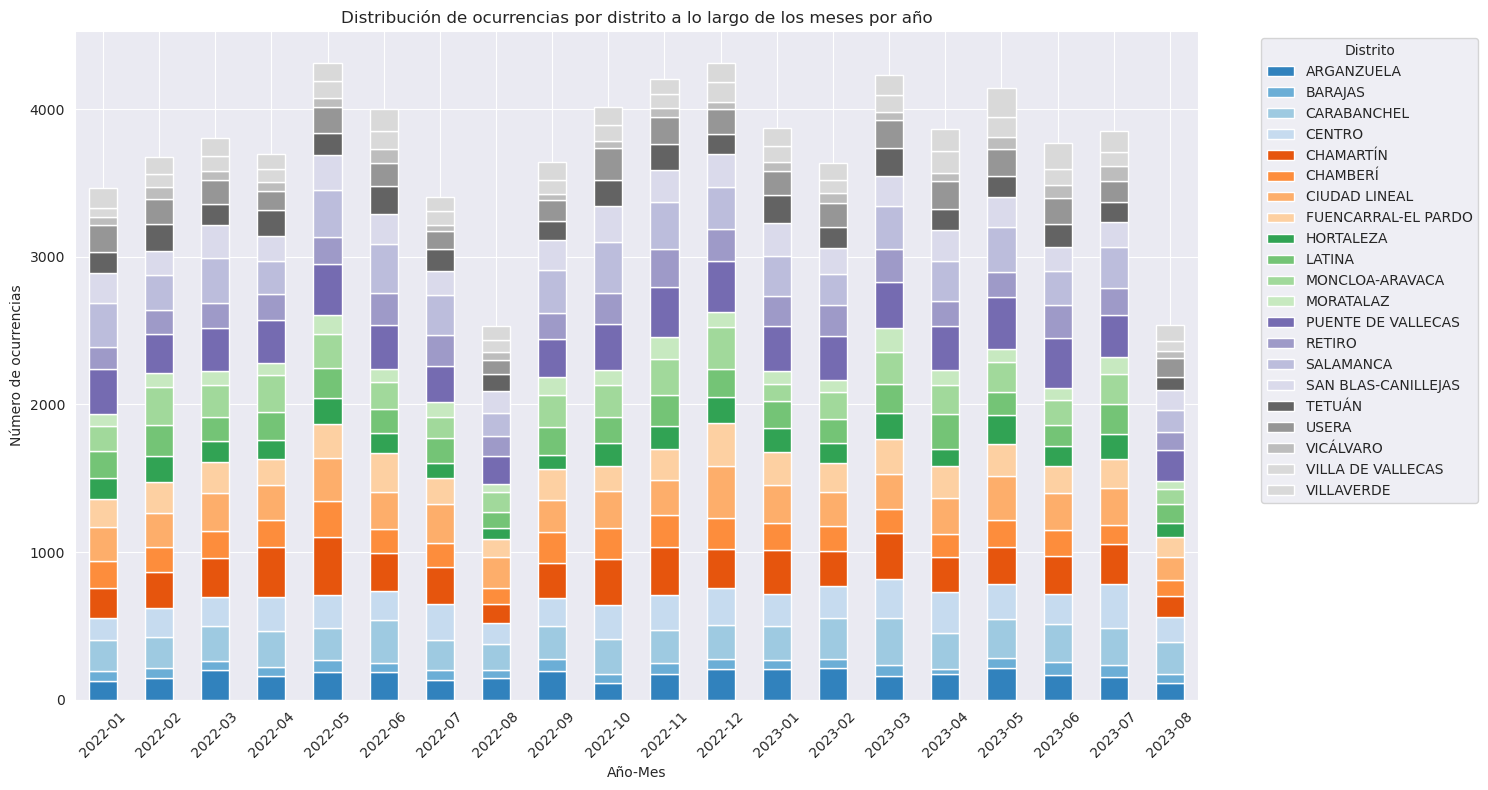

In [15]:
# Creando el gráfico de barras sobrepuestas
fig, ax = plt.subplots(figsize=(15, 8))


grouped_data.plot(kind='bar', stacked=True, ax=ax, colormap='tab20c')
plt.title('Distribución de ocurrencias por distrito a lo largo de los meses por año')
plt.ylabel('Número de ocurrencias')
plt.xlabel('Año-Mes')
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotando las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Análisis del Gráfico de Barras por Distrito
* **Distribución de Ocurrencias**: Algunos distritos presentan una mayor cantidad de ocurrencias que otros. Esto podría indicar áreas con mayor tráfico vehicular o puntos críticos que requieren atención.
* **Variabilidad Temporal**: Existen variaciones mensuales en las ocurrencias por distrito que podrían estar influenciadas por factores estacionales como condiciones meteorológicas, períodos vacacionales, o eventos locales.
* **Picos y Valles**: Los picos específicos en ciertos distritos pueden sugerir eventos o cambios temporales en el tráfico, como obras en carreteras, mientras que los valles podrían indicar períodos de menor actividad, como pueden ser las restricciones de tráfico.

## Conclusión General Ocurrencias
Los dos gráficos proporcionan perspectivas valiosas sobre las ocurrencias de accidentes. El gráfico de líneas es útil para comprender la tendencia general y los patrones estacionales de los accidentes a nivel de toda la ciudad. En cambio, el gráfico de barras sobrepuestas destaca las diferencias entre los distritos y puede ser clave para las intervenciones y políticas locales más dirigidas. La combinación de ambos enfoques puede ayudar a las autoridades a diseñar estrategias de prevención de accidentes más efectivas, dirigidas tanto a áreas específicas como a la ciudad en general.

# Verificamos si afecta el numero de pasajeros en un choque
### De esta manera sabremos si podemos quitarnos los datos de los pasajeros

1. fusionar nuestra serie pasajeros_por_accidente con el DataFrame combined_data para tener el número de pasajeros junto con los demás datos

In [16]:
# Explorar la relación entre el número de pasajeros y el tipo de accidente
relacion_pasajeros_tipo = combined_data.groupby(['tipo_accidente', 'numero_pasajeros']).size().unstack().fillna(0)

# Mostrar la relación
relacion_pasajeros_tipo

numero_pasajeros,1,2,3,4,5,6,7,8,9,10,11,14,15,17,21
tipo_accidente,,,,,,,,,,,,,,,
Alcance,113.0,8692.0,4449.0,2332.0,1285.0,438.0,287.0,56.0,27.0,10.0,0.0,0.0,0.0,0.0,0.0
Atropello a animal,111.0,30.0,15.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Atropello a persona,0.0,3636.0,1194.0,284.0,100.0,18.0,14.0,8.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
Caída,2179.0,1566.0,426.0,116.0,45.0,36.0,35.0,0.0,9.0,10.0,11.0,0.0,0.0,0.0,0.0
Choque contra obstáculo fijo,2549.0,3862.0,1227.0,400.0,130.0,60.0,7.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
Colisión frontal,23.0,1022.0,471.0,240.0,95.0,54.0,21.0,16.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
Colisión fronto-lateral,154.0,10180.0,4887.0,2392.0,955.0,504.0,147.0,56.0,27.0,20.0,11.0,14.0,0.0,17.0,21.0
Colisión lateral,94.0,7302.0,2511.0,940.0,355.0,132.0,77.0,24.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0
Colisión múltiple,39.0,370.0,1449.0,1136.0,725.0,348.0,224.0,136.0,72.0,50.0,11.0,0.0,0.0,0.0,0.0


Observamos que no tiene mucha relacion el tipo de accidente con el numero de pasajeros, más que la mayoría de los accidentes involucran vehículos sin pasajeros o con un número limitado de pasajeros.

                              Proporción Agosto  Proporción General  \
tipo_accidente                                                        
Solo salida de la vía                  0.007103            0.004242   
Otro                                   0.026046            0.015568   
Caída                                  0.068863            0.059137   
Choque contra obstáculo fijo           0.120363            0.109991   
Colisión fronto-lateral                0.273875            0.258601   
Vuelco                                 0.004538            0.004296   
Atropello a persona                    0.070442            0.070223   
Colisión frontal                       0.024467            0.026054   
Alcance                                0.219811            0.235976   
Colisión lateral                       0.134373            0.152799   
Colisión múltiple                      0.048540            0.060832   
Atropello a animal                     0.001579            0.002188   
Despeñ

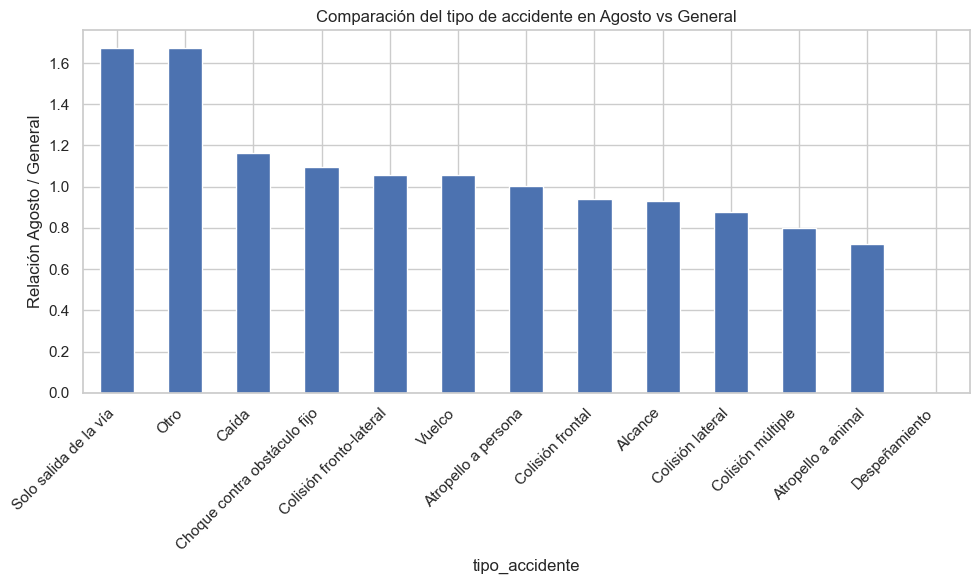

In [93]:
# Filtrar datos de agosto
agosto = combined_data[combined_data['mes'] == 'August']

# Distribución de tipos de accidente en agosto
tipo_agosto = agosto['tipo_accidente'].value_counts(normalize=True)

# Distribución general de tipos de accidente
tipo_general = combined_data['tipo_accidente'].value_counts(normalize=True)

# Asegurar que ambos tienen los mismos índices
tipos_union = tipo_agosto.index.union(tipo_general.index)
tipo_agosto = tipo_agosto.reindex(tipos_union, fill_value=0)
tipo_general = tipo_general.reindex(tipos_union, fill_value=0)

# Comparación relativa: razón entre proporción en agosto y proporción general
relacion = (tipo_agosto / tipo_general).sort_values(ascending=False)

# Mostrar como tabla
tabla_comparativa = pd.DataFrame({
    'Proporción Agosto': tipo_agosto,
    'Proporción General': tipo_general,
    'Relación Agosto/General': relacion
}).sort_values('Relación Agosto/General', ascending=False)

print(tabla_comparativa)

# Opcional: Gráfico
plt.figure(figsize=(10, 6))
relacion.plot(kind='bar')
plt.ylabel('Relación Agosto / General')
plt.title('Comparación del tipo de accidente en Agosto vs General')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Verificamos con la gravedad del accidente (lesividad)

1. Calculamos la proporción de accidentes con distintos niveles de lesividad en función del número de pasajeros

In [17]:
proporcion_lesividad = combined_data.groupby(['numero_pasajeros', 'lesividad']).size().unstack().fillna(0)
proporcion_lesividad = proporcion_lesividad.div(proporcion_lesividad.sum(axis=1), axis=0)  # Convertir a proporciones

# Visualizar las proporciones
proporcion_lesividad

lesividad,Asistencia sanitaria ambulatoria con posterioridad,Asistencia sanitaria inmediata en centro de salud o mutua,Asistencia sanitaria sólo en el lugar del accidente,Atención en urgencias sin posterior ingreso,Fallecido 24 horas,Ingreso inferior o igual a 24 horas,Ingreso superior a 24 horas,Se desconoce,Sin asistencia sanitaria
numero_pasajeros,,,,,,,,,
1,0.052505,0.108442,0.326356,0.149279,0.003432,0.159574,0.033631,0.000000,0.166781
2,0.022369,0.046313,0.242860,0.058530,0.000706,0.076556,0.025138,0.000054,0.527473
3,0.018502,0.031819,0.223442,0.044729,0.000407,0.063841,0.019518,0.000102,0.597642
4,0.018773,0.027453,0.214372,0.038151,0.001009,0.056318,0.014736,0.000000,0.629189
5,0.016142,0.021937,0.237583,0.028974,0.002070,0.054222,0.010762,0.000414,0.627897
6,0.014783,0.024348,0.222609,0.040870,0.000000,0.049565,0.003478,0.000000,0.644348
7,0.013180,0.014827,0.250412,0.041186,0.001647,0.037891,0.004942,0.000000,0.635914
8,0.008264,0.012397,0.177686,0.033058,0.000000,0.041322,0.004132,0.000000,0.723140
9,0.033898,0.000000,0.279661,0.016949,0.000000,0.025424,0.033898,0.000000,0.610169


Observamos que en accidentes sin pasajeros o con un número limitado de pasajeros, la proporción de accidentes donde no se requiere asistencia sanitaria (columna "Sin asistencia sanitaria") tiende a ser más alta.

2. Para obtener una imagen más clara, podemos visualizar estos datos. Un gráfico de áreas apiladas será útil para visualizar la distribución de niveles de lesividad en función del número de pasajeros.

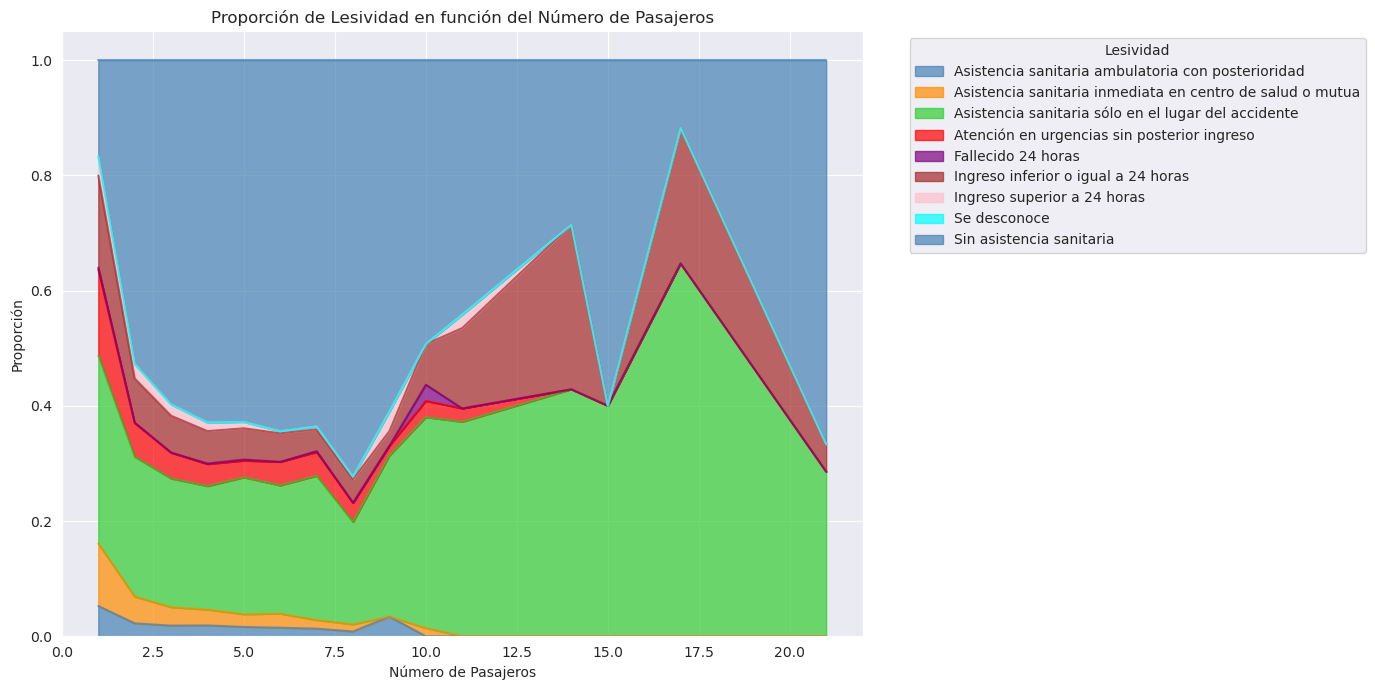

In [18]:
colors = ['steelblue', 'darkorange', 'limegreen', 'red', 'purple', 'brown', 'pink', 'cyan']

# Gráfico de barras apiladas
#proporcion_lesividad.plot(kind='bar', stacked=True, figsize=(14,7), color=colors)
#plt.title('Proporción de Lesividad en función del Número de Pasajeros')
#plt.xlabel('Número de Pasajeros')
#plt.ylabel('Proporción')
#plt.legend(title='Lesividad', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()
#plt.show()

# Gráfico de áreas apiladas
fig, ax = plt.subplots(figsize=(14,7))
proporcion_lesividad.plot(kind='area', stacked=True, ax=ax, color=colors, alpha=0.7)
ax.set_title('Proporción de Lesividad en función del Número de Pasajeros')
ax.set_xlabel('Número de Pasajeros')
ax.set_ylabel('Proporción')
ax.legend(title='Lesividad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Del Gráfico podemos sacar varias conclusiones:
1. La mayoría de los accidentes, independientemente del número de pasajeros, caen en la categoría "Sin asistencia sanitaria", lo que indica que estos accidentes no resultaron en lesiones que requirieran atención médica.
2. Para accidentes con un número más alto de pasajeros (por ejemplo, 12, 14 y 18 pasajeros), aunque el tamaño de la muestra es pequeño, parece haber una proporción mayor de accidentes en la categoría "Sin asistencia sanitaria" en comparación con los accidentes con menos pasajeros.
3. Las proporciones de otras categorías de lesividad varían, pero no se observa un patrón claro en relación con el número de pasajeros.
En general, basándonos en este análisis visual, no parece que el número de pasajeros tenga una influencia fuerte y clara en la gravedad del accidente, al menos en términos de lesividad.

# Estudio de Momento del día y condición meteorológica
Analizamos cómo la combinación de estos dos factores influye en la frecuencia de los accidentes. Específicamente, buscamos determinar si ciertas condiciones meteorológicas, como días despejados o lluviosos, tenían diferentes impactos en la ocurrencia de accidentes durante distintos momentos del día (mañana, tarde, noche). Este análisis ayudaría a identificar patrones y posibles correlaciones entre el momento del día y las condiciones del clima

Identificamos y comprender las columnas 'hora' y el 'estado meteorológico'.

In [30]:
# Revisar los valores únicos en las columnas relevantes: 'hora' y 'estado_meteorológico'
unique_hours = combined_data['hora'].unique()
unique_weather_conditions = combined_data['estado_meteorológico'].unique()
unique_hours, unique_weather_conditions

(array(['1:30:00', '0:30:00', '1:50:00', ..., '4:34:00', '1:51:00',
        '7:04:00'], dtype=object),
 array(['Despejado', nan, 'Se desconoce', 'Lluvia débil', 'Nublado',
        'LLuvia intensa', 'Granizando', 'Nevando'], dtype=object))

Agrupamos los datos según las nuevas categorías de hora y estado meteorológico. Luego calculamos la frecuencia de los accidentes para cada combinación de estas dos variables.

In [19]:
# Función para categorizar la hora del día
def categorize_hour(time_str):
    if not pd.isnull(time_str):
        hour = int(time_str.split(':')[0])
        if 5 <= hour < 12:
            return 'Mañana'
        elif 12 <= hour < 18:
            return 'Tarde'
        else:
            return 'Noche'
    else:
        return 'Desconocido'

# Aplicar la función a la columna 'hora'
combined_data['categoria_hora'] = combined_data['hora'].apply(categorize_hour)

# Manejar los valores nulos y desconocidos en 'estado_meteorológico'
combined_data['estado_meteorológico'] = combined_data['estado_meteorológico'].fillna('Desconocido')

# Contar la frecuencia de accidentes por combinación de categoría de hora y estado meteorológico
accident_frequency = combined_data.groupby(['categoria_hora', 'estado_meteorológico']).size().unstack(fill_value=0)

accident_frequency

estado_meteorológico,Desconocido,Despejado,Granizando,LLuvia intensa,Lluvia débil,Nevando,Nublado,Se desconoce
categoria_hora,,,,,,,,
Mañana,1520,13572,0,198,938,3,1293,125
Noche,3723,22018,10,471,1953,1,1736,232
Tarde,2976,21080,3,288,1093,2,1624,102


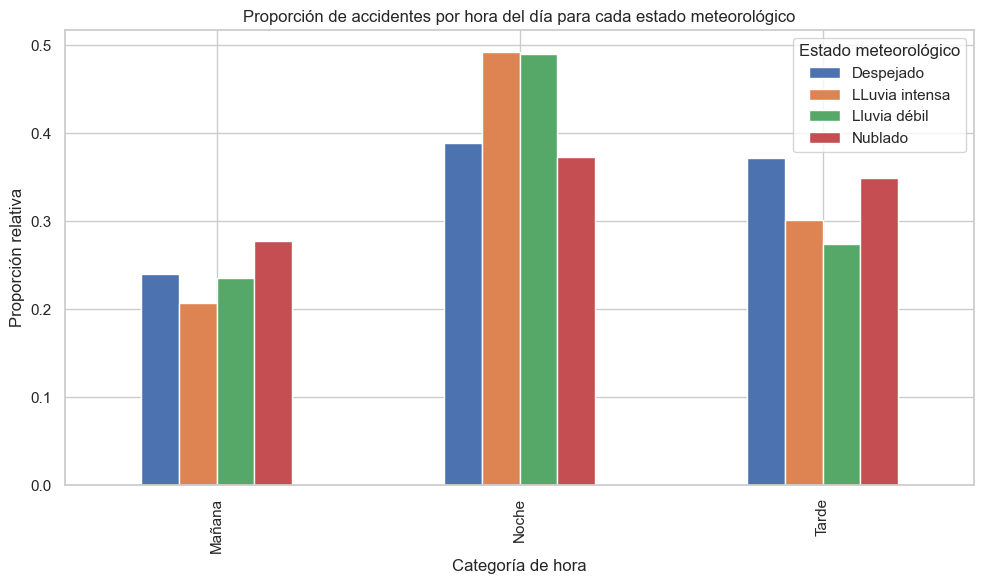

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

data_copia = combined_data.copy()

# Filtrar valores deseados
data_filtrada = data_copia[data_copia['estado_meteorológico'].isin(['Despejado', 'Nublado', 'LLuvia intensa', 'Lluvia débil'])]

# Tabla de frecuencias cruzadas: estado vs categoría de hora
tabla_cruzada = pd.crosstab(data_filtrada['estado_meteorológico'], data_filtrada['categoria_hora'])

# Calcular proporciones relativas por estado meteorológico
proporciones_relativas = tabla_cruzada.div(tabla_cruzada.sum(axis=1), axis=0)

# Transponer para graficar
proporciones_relativas.T.plot(kind='bar', figsize=(10,6))
plt.title('Proporción de accidentes por hora del día para cada estado meteorológico')
plt.xlabel('Categoría de hora')
plt.ylabel('Proporción relativa')
plt.legend(title='Estado meteorológico')
plt.tight_layout()
plt.show()


Creamos una visualización gráfica para interpretar de manera más sencilla y efectiva los resultados del análisis de frecuencia.

In [30]:
combined_data['tipo_accidente'].value_counts().nlargest(5).index

Index(['Colisión fronto-lateral', 'Alcance', 'Colisión lateral',
       'Choque contra obstáculo fijo', 'Atropello a persona'],
      dtype='object', name='tipo_accidente')

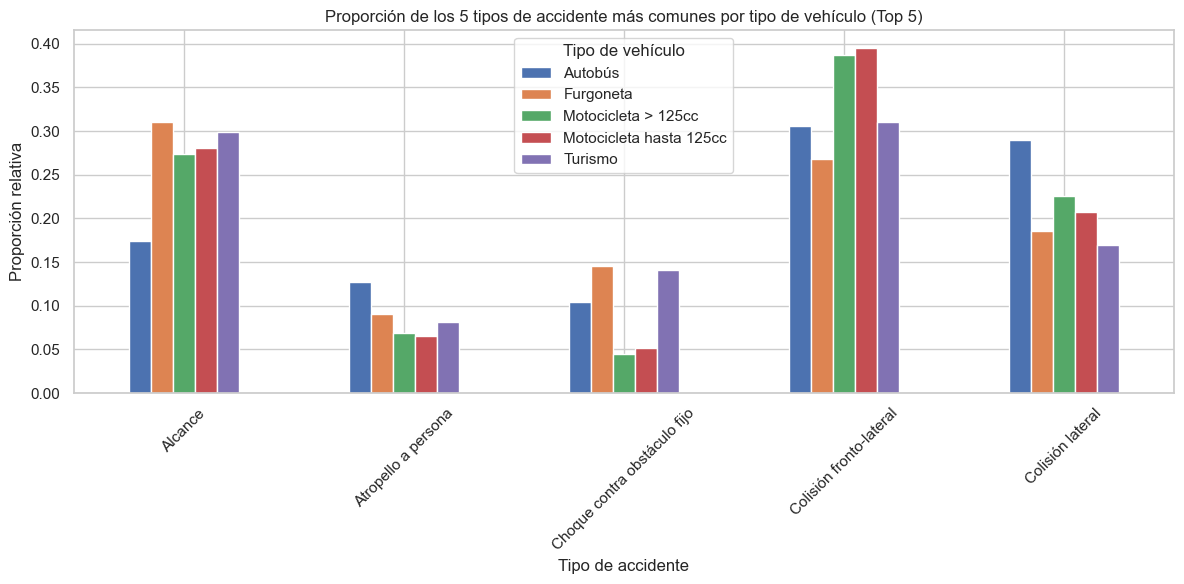

In [32]:
# Top 5 tipos de vehículo
vehiculos_comunes = combined_data['tipo_vehiculo'].value_counts().nlargest(5).index

# Top 5 tipos de accidente
accidentes_comunes = combined_data['tipo_accidente'].value_counts().nlargest(5).index

# Filtrar DataFrame
data_filtrada = combined_data[
    combined_data['tipo_vehiculo'].isin(vehiculos_comunes) &
    combined_data['tipo_accidente'].isin(accidentes_comunes)
]

# Tabla cruzada
tabla_cruzada = pd.crosstab(data_filtrada['tipo_vehiculo'], data_filtrada['tipo_accidente'])

# Proporciones relativas
proporciones_relativas = tabla_cruzada.div(tabla_cruzada.sum(axis=1), axis=0)

# Graficar
ax = proporciones_relativas.T.plot(kind='bar', figsize=(12,6))
plt.title('Proporción de los 5 tipos de accidente más comunes por tipo de vehículo (Top 5)')
plt.xlabel('Tipo de accidente')
plt.ylabel('Proporción relativa')
plt.xticks(rotation=45)
plt.legend(title='Tipo de vehículo')
plt.tight_layout()
plt.show()


Media semanal de positivos por alcohol: 26.93
Desviación típica: 6.27

Top 5 fechas con más positivos:
- Saturday 08/10/2022
- Saturday 03/12/2022
- Saturday 21/01/2023
- Saturday 15/04/2023
- Saturday 27/05/2023

Semanas con más de 3 desviaciones típicas por encima de la media:
- Semana 40 del 2022: 46 casos


/tmp/ipykernel_47852/2465473420.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positivos_alcohol['semana'] = positivos_alcohol['fecha'].dt.isocalendar().week
/tmp/ipykernel_47852/2465473420.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positivos_alcohol['año'] = positivos_alcohol['fecha'].dt.isocalendar().year


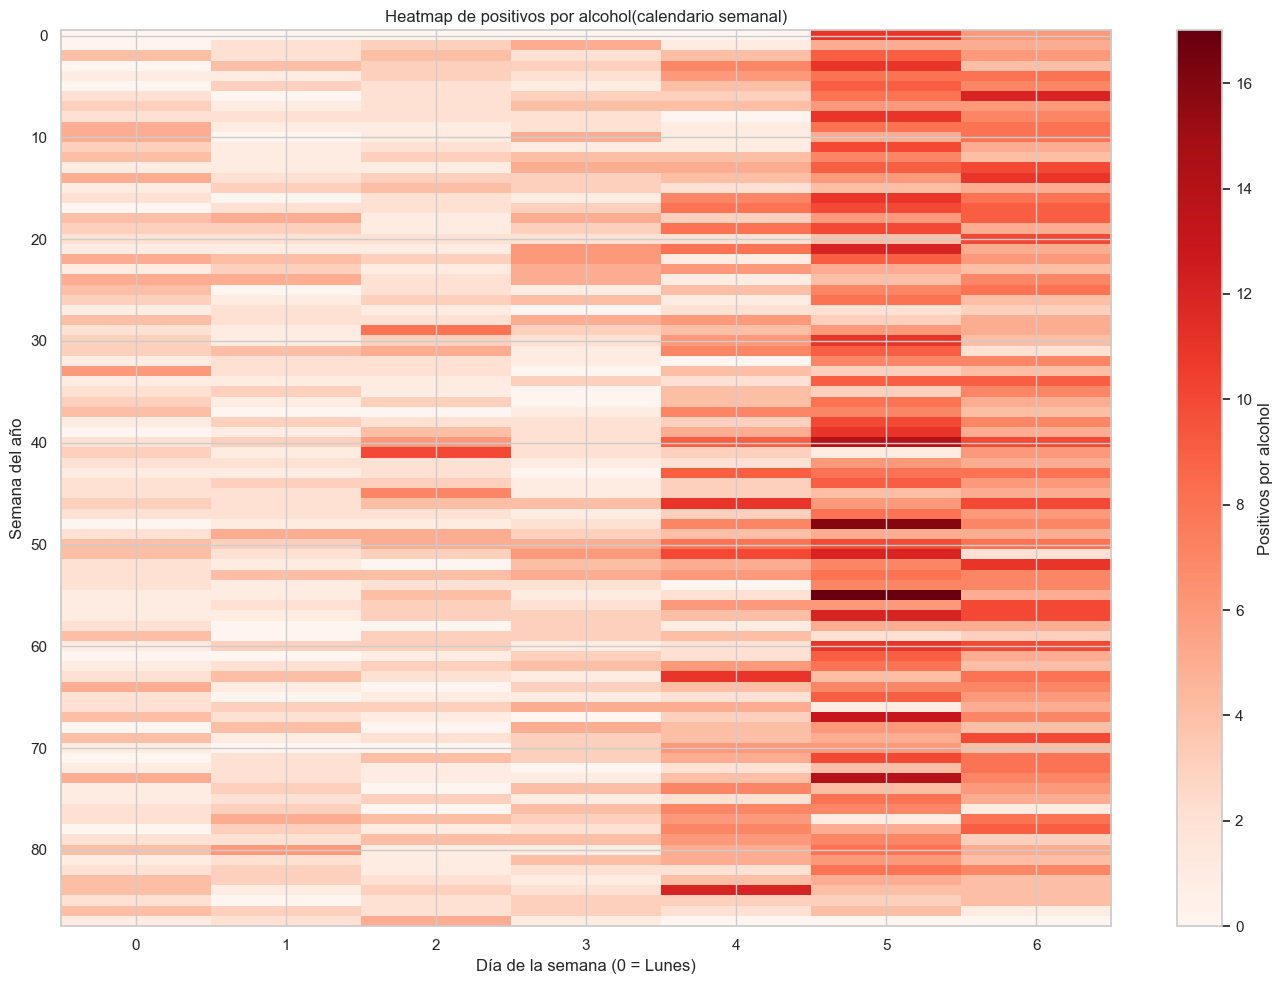

In [56]:
# Convertir la columna 'fecha' al formato correcto (dd/mm/yyyy)
combined_data['fecha'] = pd.to_datetime(combined_data['fecha'], format='%d/%m/%Y', errors='coerce')

# Filtrar positivos por alcohol
positivos_alcohol = combined_data[combined_data['positiva_alcohol'] == 1]

# Añadir columnas de semana y año
positivos_alcohol['semana'] = positivos_alcohol['fecha'].dt.isocalendar().week
positivos_alcohol['año'] = positivos_alcohol['fecha'].dt.isocalendar().year

# Agrupar por semana
positivos_por_semana = positivos_alcohol.groupby(['año', 'semana']).size()

# Media y desviación estándar
media = positivos_por_semana.mean()
desviacion = positivos_por_semana.std()

# Top 5 fechas con más positivos
top_5_fechas = positivos_alcohol['fecha'].value_counts().nlargest(5).sort_index()
top_5_fechas_texto = top_5_fechas.index.strftime('%A %d/%m/%Y').tolist()

# Semanas con casos > media + 3 * desviación
umbral = media + 3 * desviacion
semanas_extremas = positivos_por_semana[positivos_por_semana > umbral]

# Mostrar resultados
print("Media semanal de positivos por alcohol:", round(media, 2))
print("Desviación típica:", round(desviacion, 2))
print("\nTop 5 fechas con más positivos:")
for fecha in top_5_fechas_texto:
    print("-", fecha)

print("\nSemanas con más de 3 desviaciones típicas por encima de la media:")
for (año, semana), valor in semanas_extremas.items():
    print(f"- Semana {semana} del {año}: {valor} casos")

# HEATMAP CALENDARIO
# Conteo por fecha
calendario = positivos_alcohol['fecha'].value_counts().rename_axis('fecha').reset_index(name='positivos')
calendario['año'] = calendario['fecha'].dt.isocalendar().year
calendario['semana'] = calendario['fecha'].dt.isocalendar().week
calendario['día_semana'] = calendario['fecha'].dt.weekday  # 0 = lunes

# Crear tabla tipo calendario
heatmap_data = calendario.pivot_table(index=['año', 'semana'], columns='día_semana', values='positivos', fill_value=0)

# Graficar heatmap
plt.figure(figsize=(14, 10))
plt.imshow(heatmap_data, aspect='auto', cmap='Reds')
plt.colorbar(label='Positivos por alcohol')
plt.title('Heatmap de positivos por alcohol (calendario semanal)')
plt.xlabel('Día de la semana (0 = Lunes)')
plt.ylabel('Semana del año')
plt.tight_layout()
plt.show()


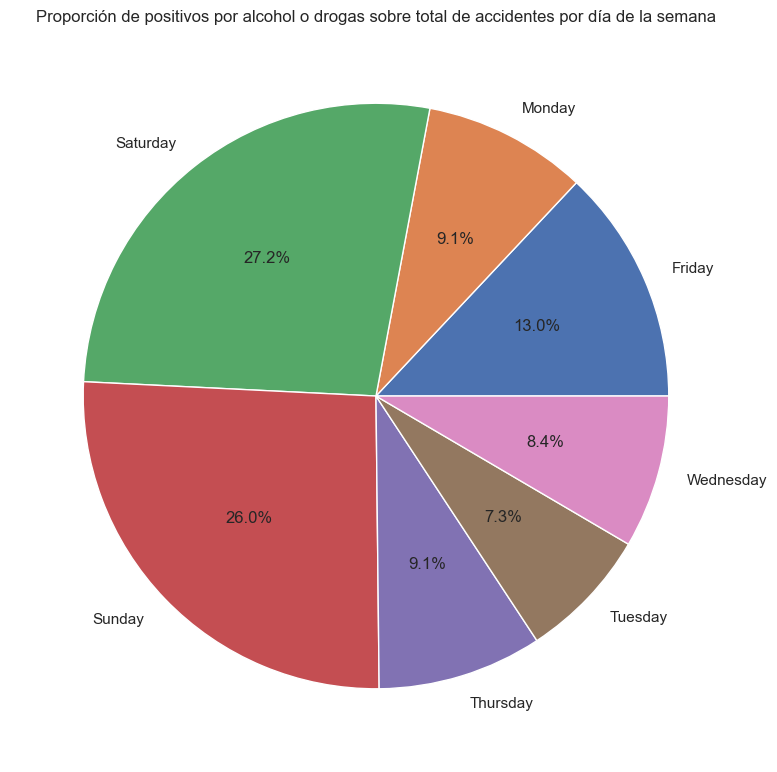

In [59]:
# Convertir la columna 'fecha' al formato correcto
combined_data['fecha'] = pd.to_datetime(combined_data['fecha'], format='%d/%m/%Y', errors='coerce')

# Añadir columna de día de la semana
combined_data['dia_semana'] = combined_data['fecha'].dt.day_name()

# Crear indicador de presencia de alcohol o droga
combined_data['positivo'] = ((combined_data['positiva_alcohol'] == 1) | (combined_data['positiva_droga'] == 1))

# Total de accidentes por día de la semana
total_por_dia = combined_data['dia_semana'].value_counts().sort_index()

# Total de positivos por día de la semana
positivos_por_dia = combined_data[combined_data['positivo']]['dia_semana'].value_counts().sort_index()

# Calcular proporciones
proporciones = (positivos_por_dia / total_por_dia).fillna(0)

# Gráfico de tarta
proporciones.plot.pie(autopct='%1.1f%%', figsize=(8, 8), ylabel='', title='Proporción de positivos por alcohol o drogas sobre total de accidentes por día de la semana')
plt.tight_layout()
plt.show()


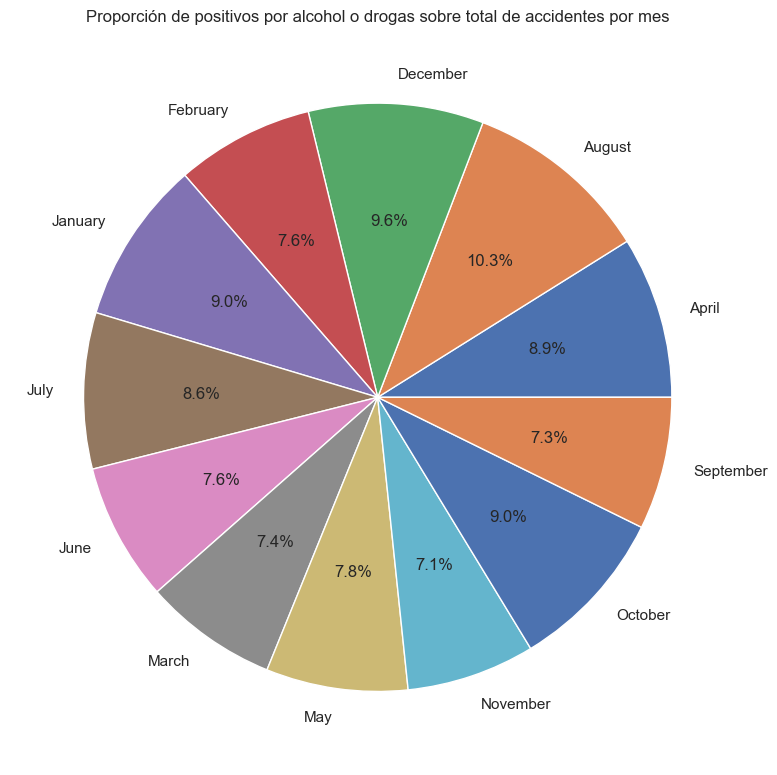

In [87]:
# Añadir columna de mes (nombre del mes)
combined_data['mes'] = combined_data['fecha'].dt.month_name()

# Total de accidentes por mes
total_por_mes = combined_data['mes'].value_counts().sort_index()

# Total de positivos por mes
positivos_por_mes = combined_data[combined_data['positivo']]['mes'].value_counts().sort_index()

# Calcular proporciones
proporciones_mes = (positivos_por_mes / total_por_mes).fillna(0)

# Gráfico de tarta
proporciones_mes.plot.pie(
    autopct='%1.1f%%',
    figsize=(8, 8),
    ylabel='',
    title='Proporción de positivos por alcohol o drogas sobre total de accidentes por mes'
)
plt.tight_layout()
plt.show()


In [102]:
# Asegurar que el campo 'sexo' está en mayúsculas para homogeneidad
combined_data['sexo'] = combined_data['sexo'].str.upper()

# Filtrar positivos
positivos = combined_data[combined_data['positivo']]

# Calcular total de positivos hombres y mujeres
total_positivos_hombres = positivos[positivos['sexo'] == 'H'].shape[0]
total_positivos_mujeres = positivos[positivos['sexo'] == 'M'].shape[0]

# Total de hombres y mujeres en accidentes
total_hombres = combined_data[combined_data['sexo'] == 'H'].shape[0]
total_mujeres = combined_data[combined_data['sexo'] == 'M'].shape[0]

# Proporciones
proporcion_hombres = total_positivos_hombres / total_hombres
proporcion_mujeres = total_positivos_mujeres / total_mujeres

# Mostrar resultados
print(f"Proporción de hombres con positivo: {proporcion_hombres:.2%}")
print(f"Proporción de mujeres con positivo: {proporcion_mujeres:.2%}")


Proporción de hombres con positivo: 4.27%
Proporción de mujeres con positivo: 1.54%


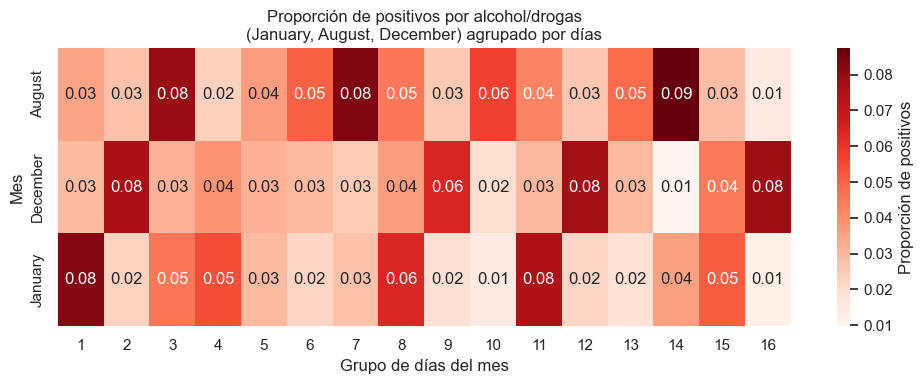

In [92]:
# Filtrar solo enero, diciembre y agosto
meses_interes = ['January', 'December', 'August']
data_meses = combined_data[combined_data['mes'].isin(meses_interes)].copy()

# Crear día del mes como entero
data_meses['dia_mes'] = data_meses['fecha'].dt.day

# Agrupar días en bloques de 3 (1–3, 4–6, ..., 28–31 → agrupados como 10 grupos)
data_meses['grupo_dia'] = ((data_meses['dia_mes'] - 1) // 2) + 1

# Calcular total y positivos por grupo y mes
tabla = data_meses.groupby(['mes', 'grupo_dia'])['positivo'].agg(
    total='count', positivos='sum'
).reset_index()

# Calcular proporción
tabla['proporcion'] = tabla['positivos'] / tabla['total']
tabla = tabla.pivot(index='mes', columns='grupo_dia', values='proporcion').fillna(0)

# Mapa de calor
plt.figure(figsize=(10, 4))
sns.heatmap(tabla, cmap='Reds', annot=True, fmt=".2f", cbar_kws={'label': 'Proporción de positivos'})
plt.title('Proporción de positivos por alcohol/drogas\n(January, August, December) agrupado por días')
plt.xlabel('Grupo de días del mes')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()


In [51]:
combined_data[''].unique()

array([nan, 'Asistencia sanitaria sólo en el lugar del accidente',
       'Ingreso inferior o igual a 24 horas',
       'Ingreso superior a 24 horas', 'Sin asistencia sanitaria',
       'Atención en urgencias sin posterior ingreso',
       'Fallecido 24 horas',
       'Asistencia sanitaria inmediata en centro de salud o mutua',
       'Asistencia sanitaria ambulatoria con posterioridad',
       'Se desconoce'], dtype=object)

/tmp/ipykernel_47852/1495315942.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lesividad_data['alcohol_o_droga'] = (


,Sin alcohol/drogas,Con alcohol/drogas
lesividad,,
Asistencia sanitaria ambulatoria con posterioridad,2.26%,1.23%
Asistencia sanitaria inmediata en centro de salud o mutua,4.27%,2.03%
Asistencia sanitaria sólo en el lugar del accidente,24.24%,18.14%
Atención en urgencias sin posterior ingreso,5.67%,4.43%
Fallecido 24 horas,0.10%,0.00%
Ingreso inferior o igual a 24 horas,7.31%,10.16%
Ingreso superior a 24 horas,2.08%,3.19%
Se desconoce,0.01%,0.00%
Sin asistencia sanitaria,54.06%,60.81%


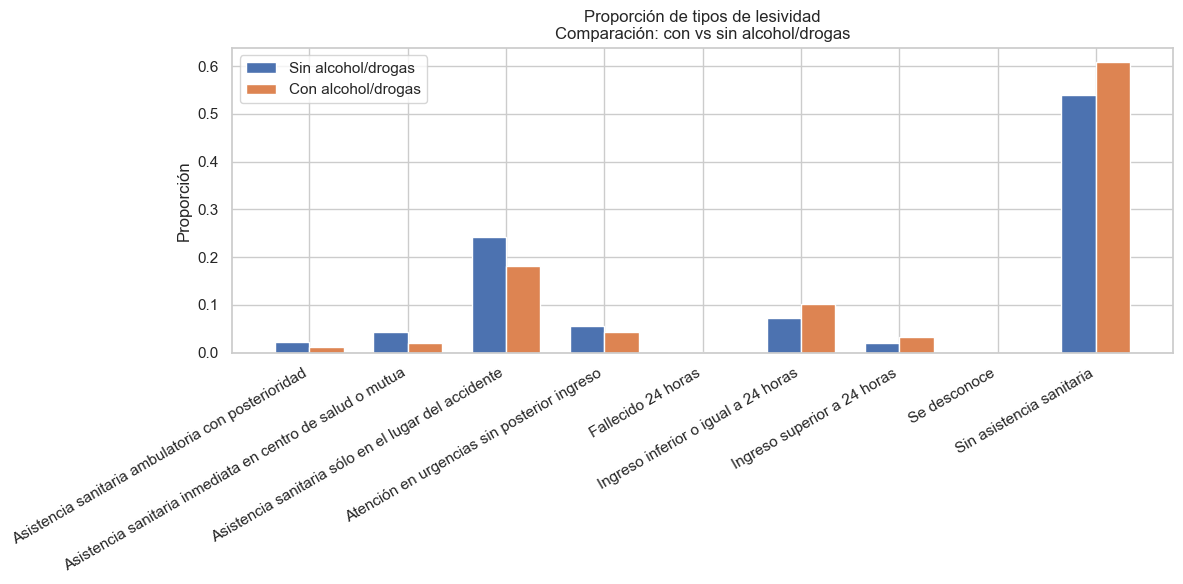

In [60]:
# Filtrar datos con lesividad conocida (excluir NaN)
lesividad_data = combined_data[combined_data['lesividad'].notna()]

# Crear columna binaria para consumo de alcohol o drogas
lesividad_data['alcohol_o_droga'] = (
    (lesividad_data['positiva_alcohol'] == 1) | (lesividad_data['positiva_droga'] == 1)
)

# Calcular proporciones
tabla_con = lesividad_data[lesividad_data['alcohol_o_droga'] == True]['lesividad'].value_counts(normalize=True)
tabla_sin = lesividad_data[lesividad_data['alcohol_o_droga'] == False]['lesividad'].value_counts(normalize=True)

# Asegurar mismo orden
lesividades = sorted(set(tabla_con.index).union(set(tabla_sin.index)))
tabla_con = tabla_con.reindex(lesividades, fill_value=0)
tabla_sin = tabla_sin.reindex(lesividades, fill_value=0)

# Mostrar tabla
tabla_df = pd.DataFrame({
    'Sin alcohol/drogas': tabla_sin,
    'Con alcohol/drogas': tabla_con
})
display(tabla_df.style.format("{:.2%}"))

# Gráfico
x = np.arange(len(lesividades))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, tabla_sin.values, width, label='Sin alcohol/drogas')
plt.bar(x + width/2, tabla_con.values, width, label='Con alcohol/drogas')

plt.xticks(x, lesividades, rotation=30, ha='right')
plt.ylabel('Proporción')
plt.title('Proporción de tipos de lesividad\nComparación: con vs sin alcohol/drogas')
plt.legend()
plt.tight_layout()
plt.show()


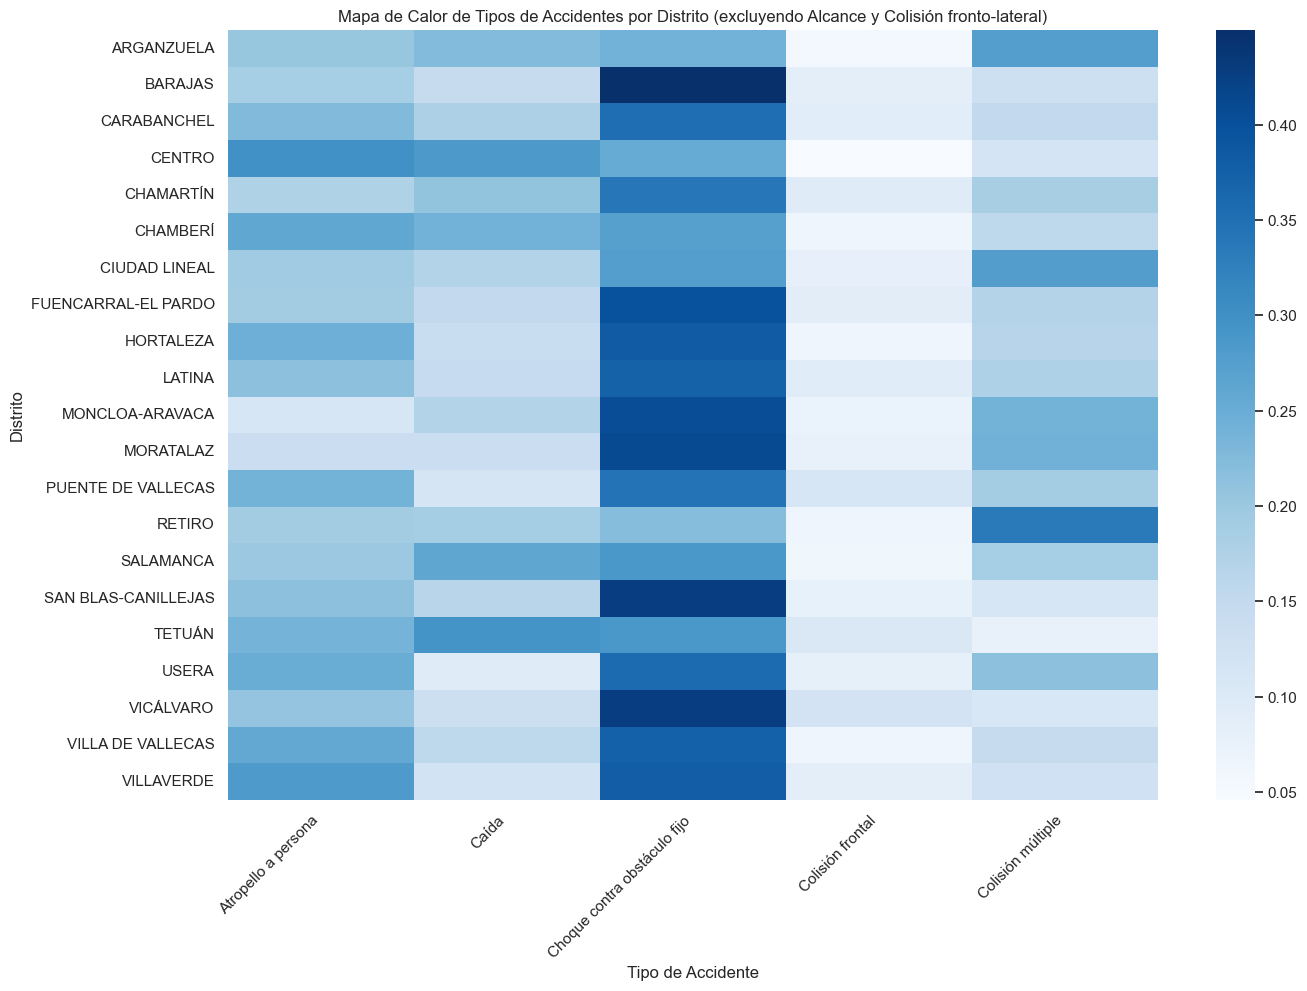

tipo_accidente,Alcance,Atropello a animal,Atropello a persona,Caída,Choque contra obstáculo fijo,Colisión frontal,Colisión fronto-lateral,Colisión lateral,Colisión múltiple,Despeñamiento,Otro,Solo salida de la vía,Vuelco
distrito,,,,,,,,,,,,,
ARGANZUELA,896,6,221,242,260,58,721,603,299,0,42,9,21
BARAJAS,252,2,80,62,192,37,412,221,56,0,21,12,4
CARABANCHEL,1062,13,376,296,585,151,1247,693,250,0,68,6,14
CENTRO,852,7,457,434,388,70,1001,864,179,0,93,4,6
CHAMARTÍN,1310,5,260,312,507,141,1441,867,277,0,76,21,14
CHAMBERÍ,720,2,256,236,268,64,1012,720,154,0,61,5,15
CIUDAD LINEAL,1311,9,298,264,427,123,1200,783,429,0,65,21,20
FUENCARRAL-EL PARDO,958,14,260,207,541,122,1020,603,230,0,60,28,31
HORTALEZA,593,9,247,143,385,64,804,330,168,0,52,19,15


In [74]:
# Crear una tabla cruzada (crosstab) para contar la frecuencia de tipos de accidente por distrito
accident_type_by_district = pd.crosstab(combined_data['distrito'], combined_data['tipo_accidente'])

tipos_excluir = ['Alcance', 'Colisión fronto-lateral', 'Colisión lateral','Atropello a animal', 'Despeñamiento', 'Solo salida de la vía', 'Otro', 'Vuelco']
accident_type_by_district_filtrada = accident_type_by_district.drop(columns=tipos_excluir, errors='ignore')

# Normalizar los datos para que las diferencias en el número total de accidentes por distrito no sesguen los resultados
accident_type_by_district_normalized = accident_type_by_district_filtrada.div(accident_type_by_district_filtrada.sum(axis=1), axis=0)

# Crear el mapa de calor con una paleta de colores adecuada para ambos modos (oscuro y claro)
plt.figure(figsize=(15, 10))
sns.heatmap(accident_type_by_district_normalized, annot=False, cmap='Blues')

# Título y etiquetas
plt.title('Mapa de Calor de Tipos de Accidentes por Distrito (excluyendo Alcance y Colisión fronto-lateral)')
plt.xlabel('Tipo de Accidente')
plt.ylabel('Distrito')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Mostrar tabla original completa (incluyendo Alcance y Colisión fronto-lateral)
accident_type_by_district

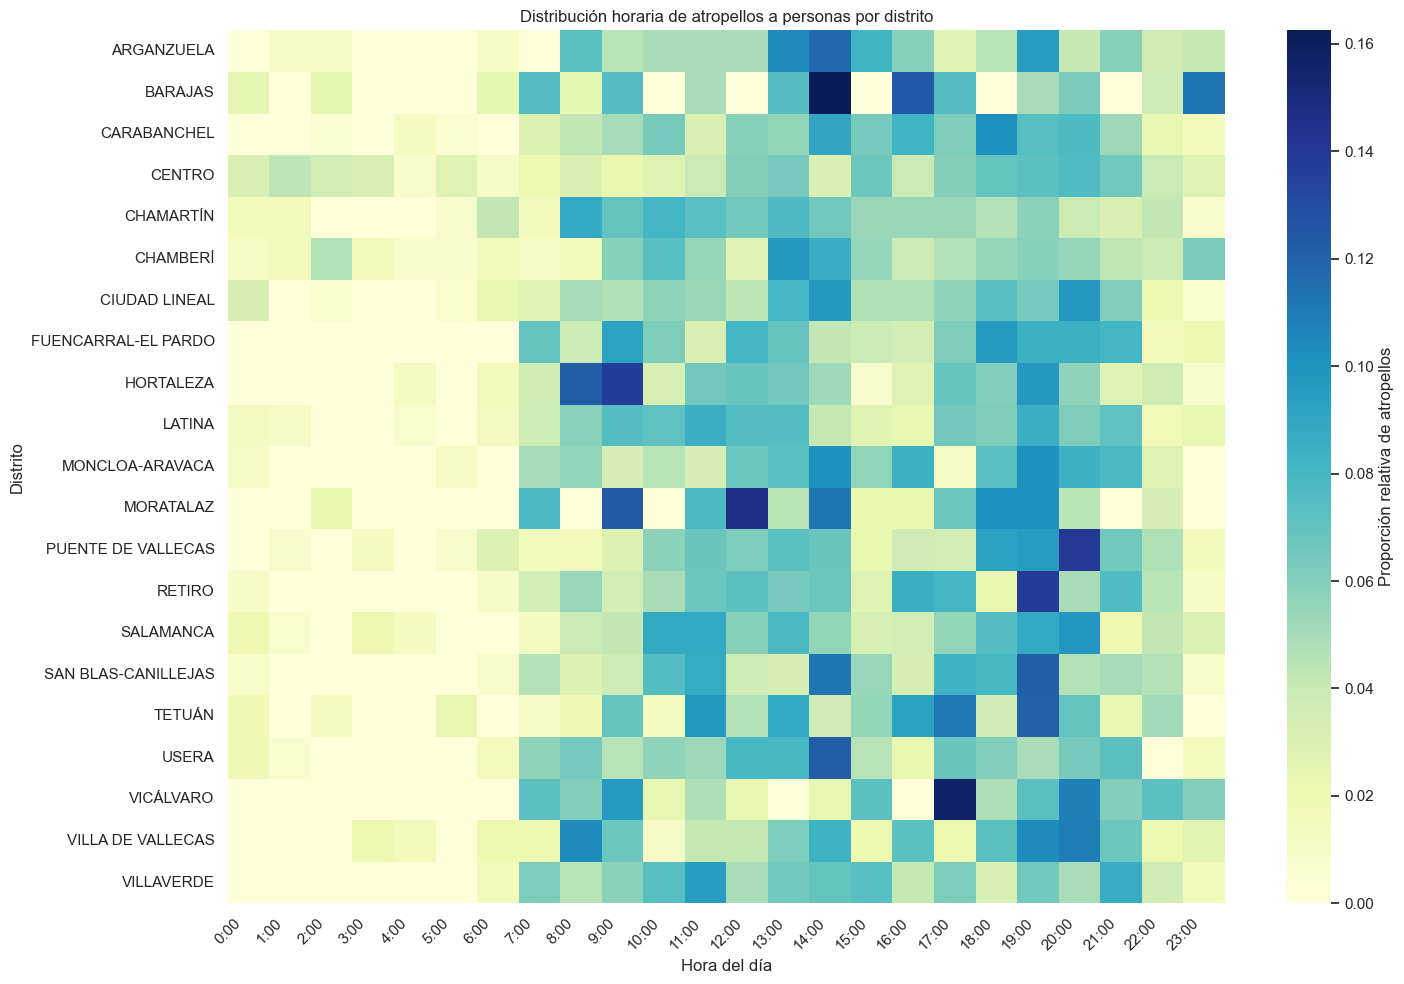

In [76]:
# Extraer la hora como entero (0-23) desde el campo 'hora' (formato 'HH:MM:SS')
combined_data['hora_int'] = combined_data['hora'].str.split(':').str[0].astype(float).astype(int)

# Filtrar solo atropellos a personas
atropellos = combined_data[combined_data['tipo_accidente'] == 'Atropello a persona']

# Crear tabla cruzada: distritos vs hora (conteo de atropellos)
tabla_atropellos = pd.crosstab(atropellos['distrito'], atropellos['hora_int'])

# Ordenar columnas por hora
tabla_atropellos = tabla_atropellos.reindex(columns=range(24), fill_value=0)

# Normalizar por fila para comparar distribución relativa en cada distrito
tabla_norm = tabla_atropellos.div(tabla_atropellos.sum(axis=1), axis=0).fillna(0)

# Graficar heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(tabla_norm, cmap='YlGnBu', cbar_kws={'label': 'Proporción relativa de atropellos'})
plt.title('Distribución horaria de atropellos a personas por distrito')
plt.xlabel('Hora del día')
plt.ylabel('Distrito')
plt.xticks(ticks=range(24), labels=[f'{h}:00' for h in range(24)], rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


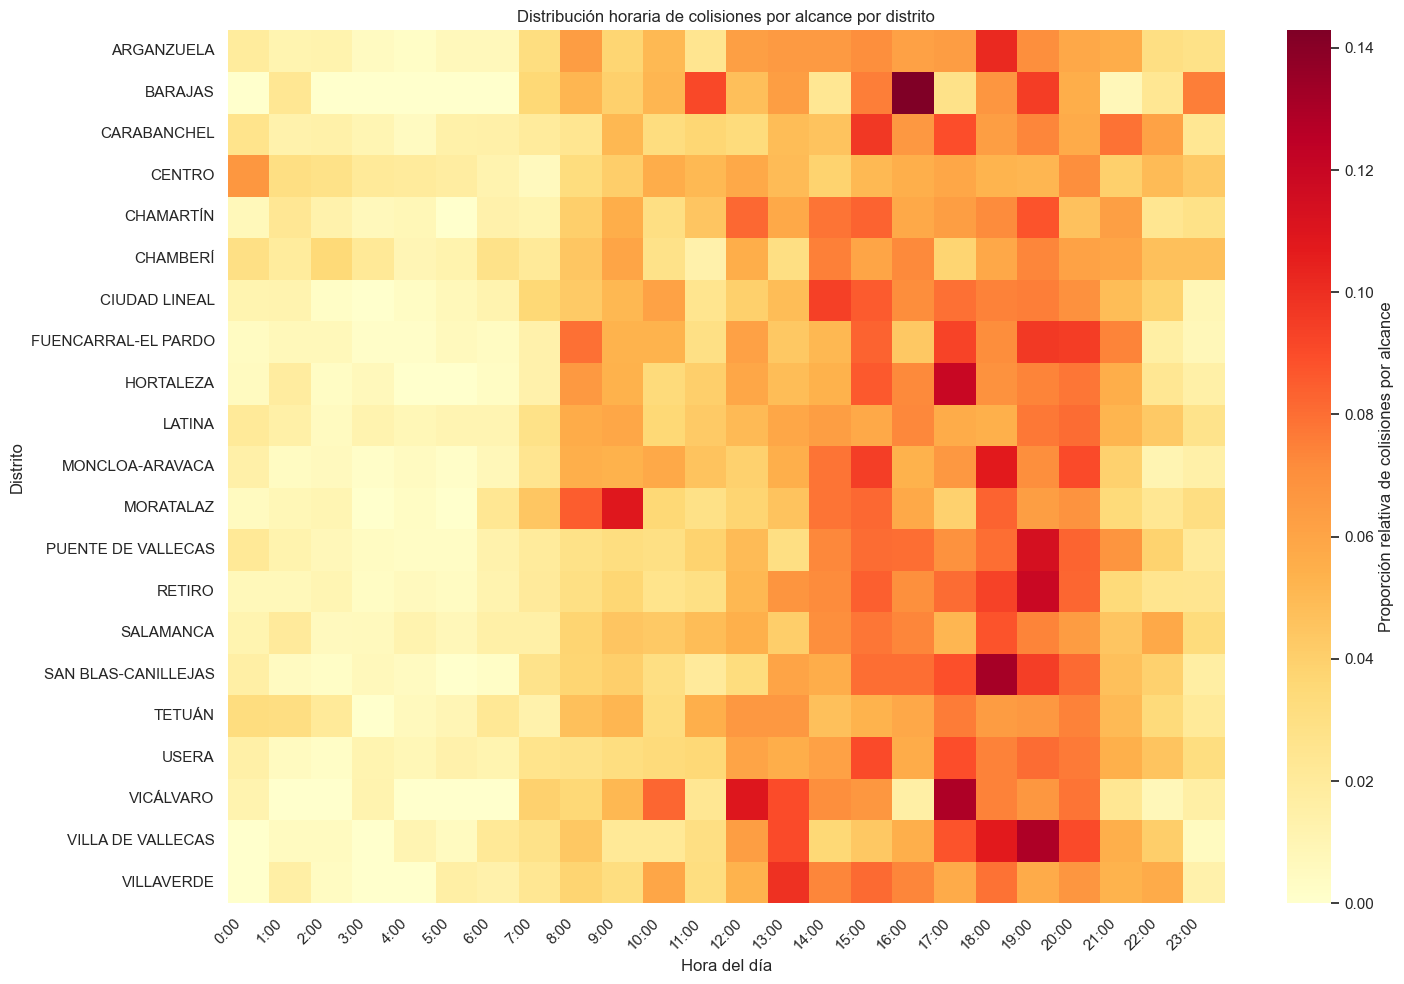

In [77]:
# Extraer la hora como entero (0-23) desde el campo 'hora' (formato 'HH:MM:SS')
combined_data['hora_int'] = combined_data['hora'].str.split(':').str[0].astype(float).astype(int)

# Filtrar solo colisiones por alcance
colisiones_alcance = combined_data[combined_data['tipo_accidente'] == 'Alcance']

# Crear tabla cruzada: distritos vs hora (conteo de colisiones por alcance)
tabla_alcance = pd.crosstab(colisiones_alcance['distrito'], colisiones_alcance['hora_int'])

# Ordenar columnas por hora
tabla_alcance = tabla_alcance.reindex(columns=range(24), fill_value=0)

# Normalizar por fila para comparar distribución relativa en cada distrito
tabla_alcance_norm = tabla_alcance.div(tabla_alcance.sum(axis=1), axis=0).fillna(0)

# Graficar heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(tabla_alcance_norm, cmap='YlOrRd', cbar_kws={'label': 'Proporción relativa de colisiones por alcance'})
plt.title('Distribución horaria de colisiones por alcance por distrito')
plt.xlabel('Hora del día')
plt.ylabel('Distrito')
plt.xticks(ticks=range(24), labels=[f'{h}:00' for h in range(24)], rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


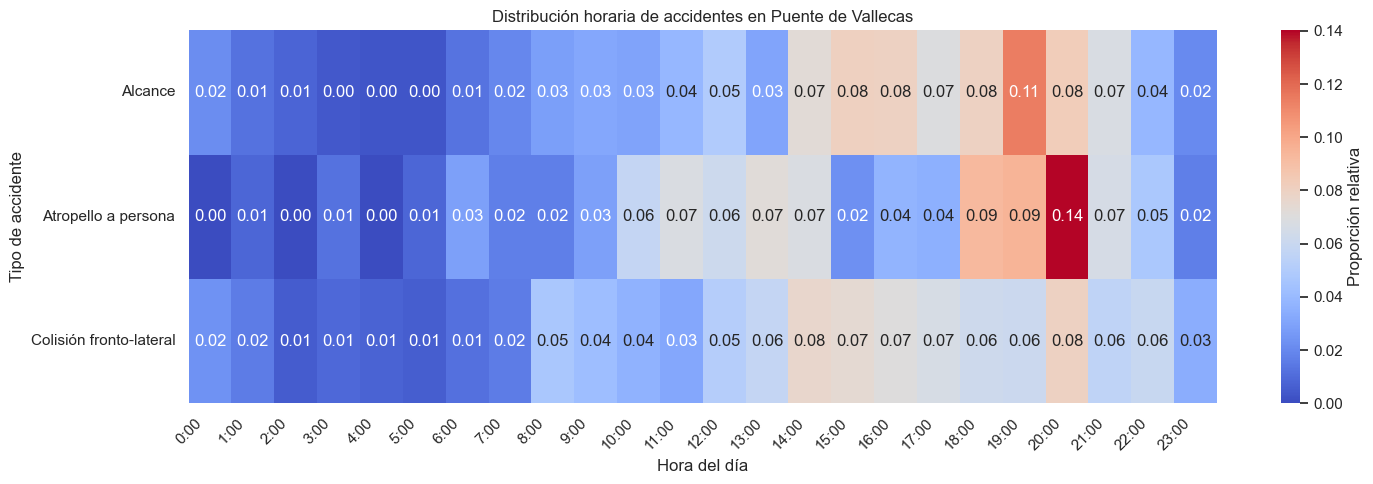

In [81]:
# Extraer hora entera (0-23)
combined_data['hora_int'] = combined_data['hora'].str.split(':').str[0].astype(float).astype(int)

# Filtrar datos
tipos_accidente = ['Alcance', 'Colisión fronto-lateral', 'Atropello a persona']
pv_data = combined_data[(combined_data['distrito'] == 'PUENTE DE VALLECAS') &
                        (combined_data['tipo_accidente'].isin(tipos_accidente))]

if pv_data.empty:
    print("No hay datos para Puente de Vallecas con esos tipos de accidente.")
else:
    tabla_pv = pd.crosstab(pv_data['tipo_accidente'], pv_data['hora_int'])
    tabla_pv = tabla_pv.reindex(columns=range(24), fill_value=0)
    tabla_pv_norm = tabla_pv.div(tabla_pv.sum(axis=1), axis=0).fillna(0)

    if tabla_pv_norm.values.size == 0:
        print("La tabla normalizada está vacía, no hay datos para graficar.")
    else:
        plt.figure(figsize=(15, 5))
        sns.heatmap(tabla_pv_norm, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Proporción relativa'})
        plt.title('Distribución horaria de accidentes en Puente de Vallecas')
        plt.xlabel('Hora del día')
        plt.ylabel('Tipo de accidente')
        plt.xticks(ticks=range(24), labels=[f'{h}:00' for h in range(24)], rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()


/tmp/ipykernel_47852/1884795133.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_atropellos['hora_int'] = pv_atropellos['hora'].str.split(':').str[0].astype(int)


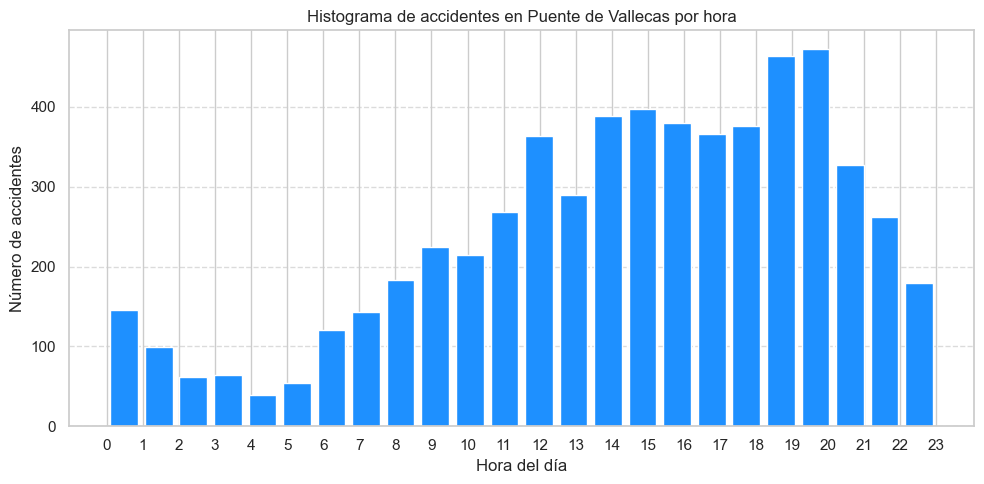

In [86]:
# Filtrar atropellos en Puente de Vallecas (mayúsculas)
pv_atropellos = combined_data[
    (combined_data['distrito'].str.upper() == 'PUENTE DE VALLECAS') &
    (combined_data['tipo_accidente'])
]

# Extraer hora entera
pv_atropellos['hora_int'] = pv_atropellos['hora'].str.split(':').str[0].astype(int)

# Histograma
plt.figure(figsize=(10,5))
pv_atropellos['hora_int'].hist(bins=24, rwidth=0.8, color='dodgerblue')
plt.xticks(range(24))
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.title('Histograma de accidentes en Puente de Vallecas por hora')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


                              Proporción Puente de Vallecas  \
tipo_accidente                                                
Colisión frontal                                   0.038272   
Atropello a animal                                 0.002722   
Atropello a persona                                0.082497   
Choque contra obstáculo fijo                       0.119238   
Colisión múltiple                                  0.065828   
Colisión fronto-lateral                            0.262630   
Alcance                                            0.233713   
Solo salida de la vía                              0.003912   
Otro                                               0.013948   
Colisión lateral                                   0.133696   
Vuelco                                             0.003402   
Caída                                              0.040143   
Despeñamiento                                      0.000000   

                              Proporción General  Rela

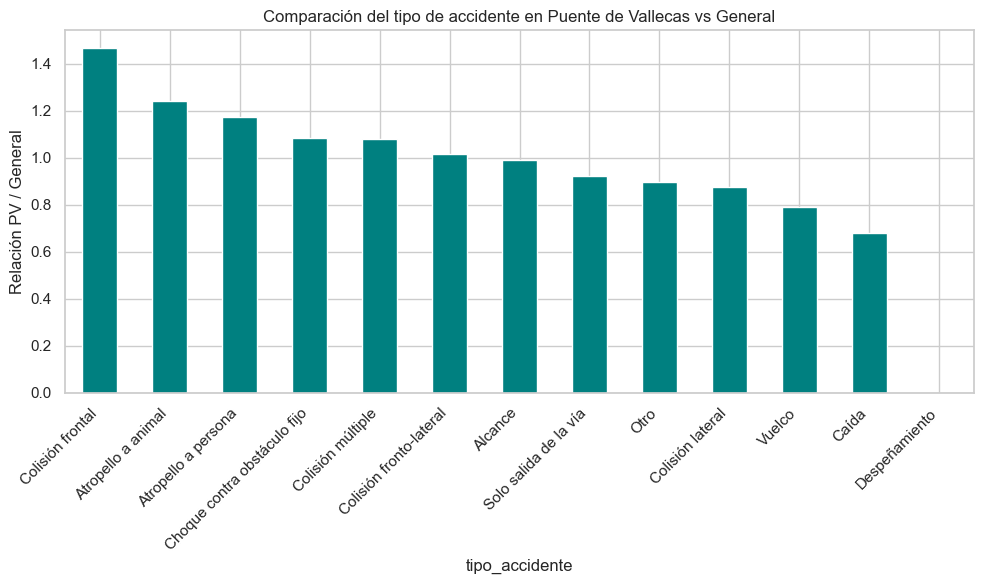

In [94]:
# Filtrar datos de Puente de Vallecas
pv = combined_data[combined_data['distrito'] == 'PUENTE DE VALLECAS']

# Distribución de tipos de accidente en Puente de Vallecas
tipo_pv = pv['tipo_accidente'].value_counts(normalize=True)

# Distribución general de tipos de accidente
tipo_general = combined_data['tipo_accidente'].value_counts(normalize=True)

# Asegurar mismos índices
tipos_union = tipo_pv.index.union(tipo_general.index)
tipo_pv = tipo_pv.reindex(tipos_union, fill_value=0)
tipo_general = tipo_general.reindex(tipos_union, fill_value=0)

# Comparación relativa: proporción en Puente de Vallecas vs proporción general
relacion_pv = (tipo_pv / tipo_general).sort_values(ascending=False)

# Mostrar como tabla
tabla_comparativa_pv = pd.DataFrame({
    'Proporción Puente de Vallecas': tipo_pv,
    'Proporción General': tipo_general,
    'Relación PV / General': relacion_pv
}).sort_values('Relación PV / General', ascending=False)

print(tabla_comparativa_pv)

# Gráfico
plt.figure(figsize=(10, 6))
relacion_pv.plot(kind='bar', color='teal')
plt.ylabel('Relación PV / General')
plt.title('Comparación del tipo de accidente en Puente de Vallecas vs General')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


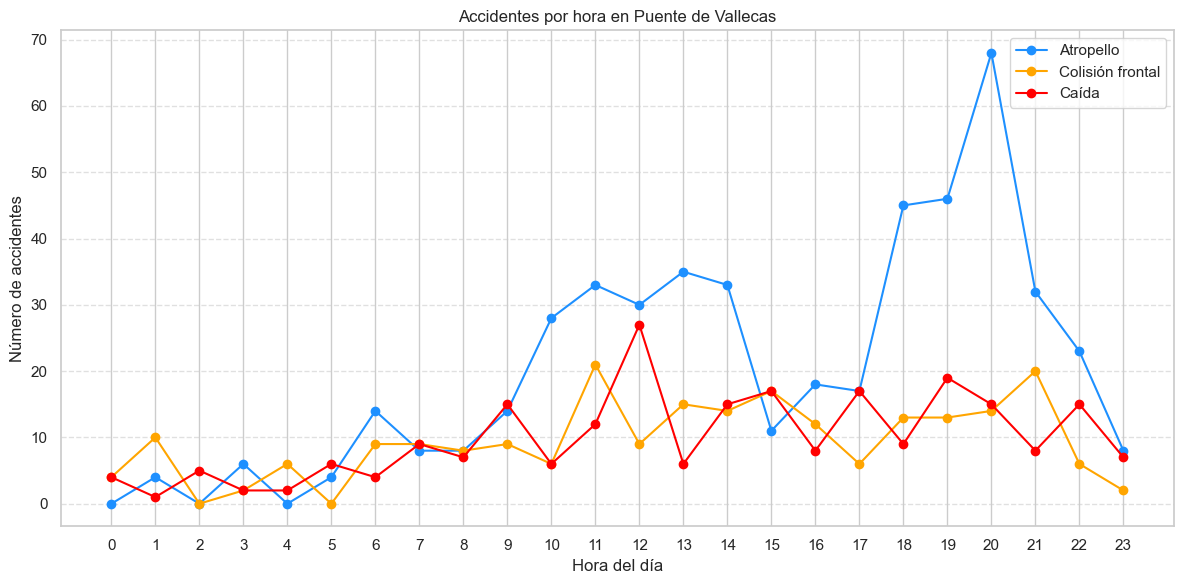

In [97]:
# Asegurar mayúsculas para distrito
combined_data['distrito'] = combined_data['distrito'].str.upper()

# Filtrar datos de Puente de Vallecas
pv = combined_data[combined_data['distrito'] == 'PUENTE DE VALLECAS'].copy()

# Extraer la hora entera
pv['hora_int'] = pv['hora'].str.split(':').str[0].astype(int)

# Filtrar por tipo
pv_atropellos = pv[pv['tipo_accidente'].str.upper() == 'ATROPELLO A PERSONA']
pv_colision_frontal = pv[pv['tipo_accidente'].str.upper() == 'COLISIÓN FRONTAL']
pv_caidas = pv[pv['tipo_accidente'].str.upper() == 'CAÍDA']

# Calcular frecuencias por hora
atropellos_counts = pv_atropellos['hora_int'].value_counts().sort_index()
colision_counts = pv_colision_frontal['hora_int'].value_counts().sort_index()
caidas_counts = pv_caidas['hora_int'].value_counts().sort_index()

# Asegurar que todas las horas estén representadas
horas = range(24)
atropellos_y = [atropellos_counts.get(h, 0) for h in horas]
colision_y = [colision_counts.get(h, 0) for h in horas]
caidas_y = [caidas_counts.get(h, 0) for h in horas]

# Plot
plt.figure(figsize=(12, 6))

plt.plot(horas, atropellos_y, label='Atropello', color='dodgerblue', marker='o')
plt.plot(horas, colision_y, label='Colisión frontal', color='orange', marker='o')
plt.plot(horas, caidas_y, label='Caída', color='red', marker='o')

plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.title('Accidentes por hora en Puente de Vallecas')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


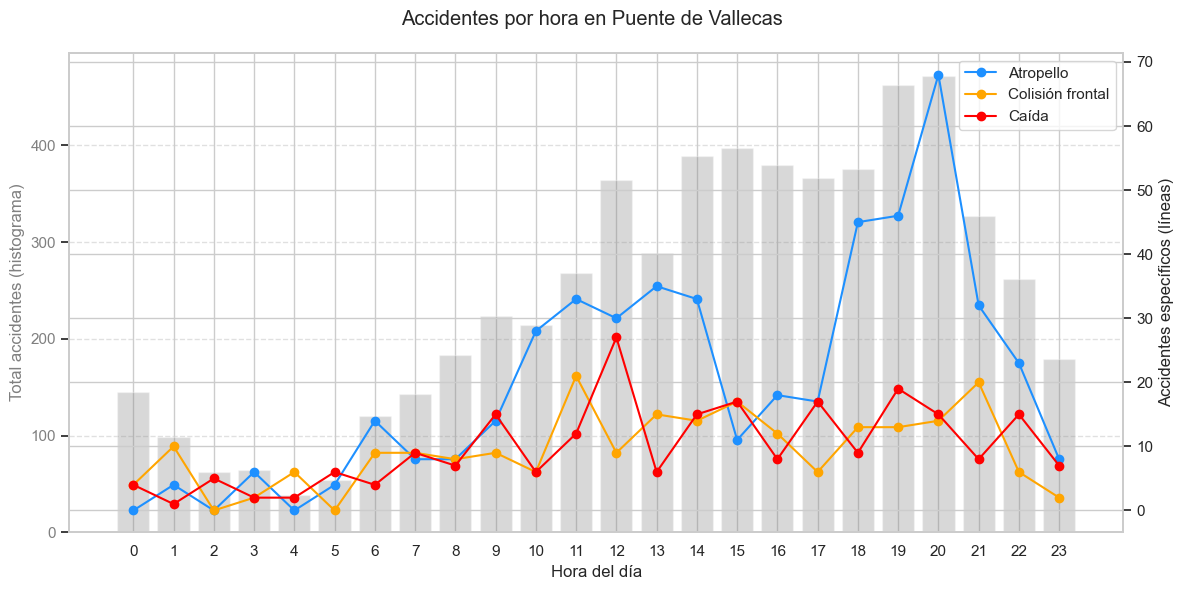

In [98]:
# Asegurar mayúsculas para distrito
combined_data['distrito'] = combined_data['distrito'].str.upper()

# Filtrar datos de Puente de Vallecas
pv = combined_data[combined_data['distrito'] == 'PUENTE DE VALLECAS'].copy()

# Extraer la hora entera
pv['hora_int'] = pv['hora'].str.split(':').str[0].astype(int)

# Filtrar por tipo
pv_atropellos = pv[pv['tipo_accidente'].str.upper() == 'ATROPELLO A PERSONA']
pv_colision_frontal = pv[pv['tipo_accidente'].str.upper() == 'COLISIÓN FRONTAL']
pv_caidas = pv[pv['tipo_accidente'].str.upper() == 'CAÍDA']

# Calcular frecuencias por hora
horas = range(24)
atropellos_y = [pv_atropellos['hora_int'].value_counts().get(h, 0) for h in horas]
colision_y = [pv_colision_frontal['hora_int'].value_counts().get(h, 0) for h in horas]
caidas_y = [pv_caidas['hora_int'].value_counts().get(h, 0) for h in horas]
totales_y = [pv['hora_int'].value_counts().get(h, 0) for h in horas]

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Histograma de totales (eje primario)
ax1.bar(horas, totales_y, width=0.8, alpha=0.3, color='gray', label='Total accidentes')
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Total accidentes (histograma)', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')
ax1.set_xticks(range(24))

# Eje secundario para líneas
ax2 = ax1.twinx()
ax2.plot(horas, atropellos_y, label='Atropello', color='dodgerblue', marker='o')
ax2.plot(horas, colision_y, label='Colisión frontal', color='orange', marker='o')
ax2.plot(horas, caidas_y, label='Caída', color='red', marker='o')
ax2.set_ylabel('Accidentes específicos (líneas)')
ax2.tick_params(axis='y')

# Título y leyenda
fig.suptitle('Accidentes por hora en Puente de Vallecas')
ax2.legend(loc='upper right')
ax1.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [99]:
from my_map_creator import MapCreator
# Asegurar mayúsculas en distrito
combined_data['distrito'] = combined_data['distrito'].str.upper()

# Filtrar atropellos en PUENTE DE VALLECAS
pv_atropellos = combined_data[
    (combined_data['distrito'] == 'PUENTE DE VALLECAS') &
    (combined_data['tipo_accidente'].str.upper() == 'ATROPELLO A PERSONA')
].copy()

# Convertir coordenadas a numéricas (si están como texto)
pv_atropellos['coordenada_x_utm'] = pd.to_numeric(
    pv_atropellos['coordenada_x_utm'].astype(str).str.replace(',', '.'), errors='coerce'
)
pv_atropellos['coordenada_y_utm'] = pd.to_numeric(
    pv_atropellos['coordenada_y_utm'].astype(str).str.replace(',', '.'), errors='coerce'
)

# Crear y mostrar mapa
mapa = MapCreator(
    pv_atropellos,
    lat_col_name='coordenada_x_utm',
    long_col_name='coordenada_y_utm',
    columns_for_label=['fecha', 'hora', 'tipo_accidente', 'estado_meteorológico'],
    is_cords_utm=True
)
mapa.create_map(map_name='atropellos_puente_vallecas')


/tmp/ipykernel_47852/37075588.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_atropellos['hora_int'] = pv_atropellos['hora'].str.split(':').str[0].astype(int)


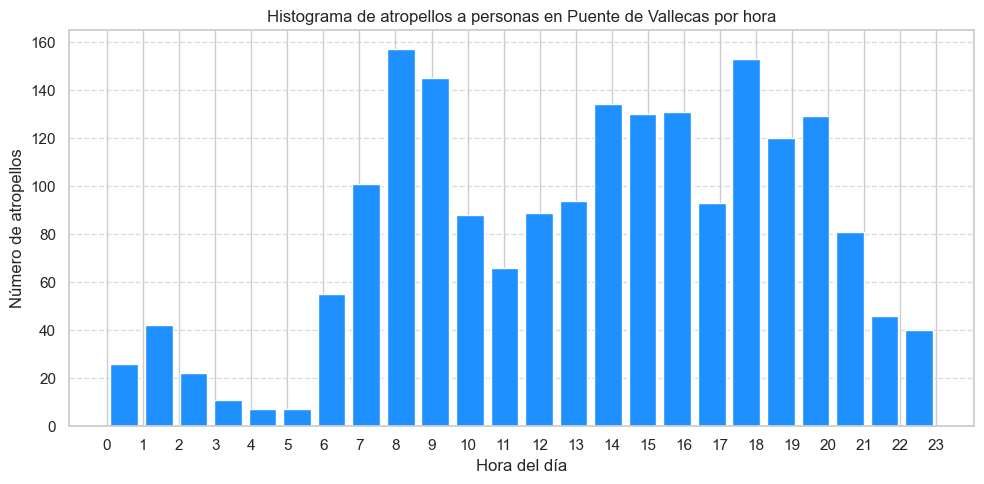

In [84]:
# Filtrar atropellos en Puente de Vallecas (mayúsculas)
pv_atropellos = combined_data[
    (combined_data['distrito'].str.upper() == 'MORATALAZ') &
    (combined_data['tipo_accidente'] == 'Atropello a persona')
]

# Extraer hora entera
pv_atropellos['hora_int'] = pv_atropellos['hora'].str.split(':').str[0].astype(int)

# Histograma
plt.figure(figsize=(10,5))
pv_atropellos['hora_int'].hist(bins=24, rwidth=0.8, color='dodgerblue')
plt.xticks(range(24))
plt.xlabel('Hora del día')
plt.ylabel('Número de atropellos')
plt.title('Histograma de atropellos a personas en Puente de Vallecas por hora')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


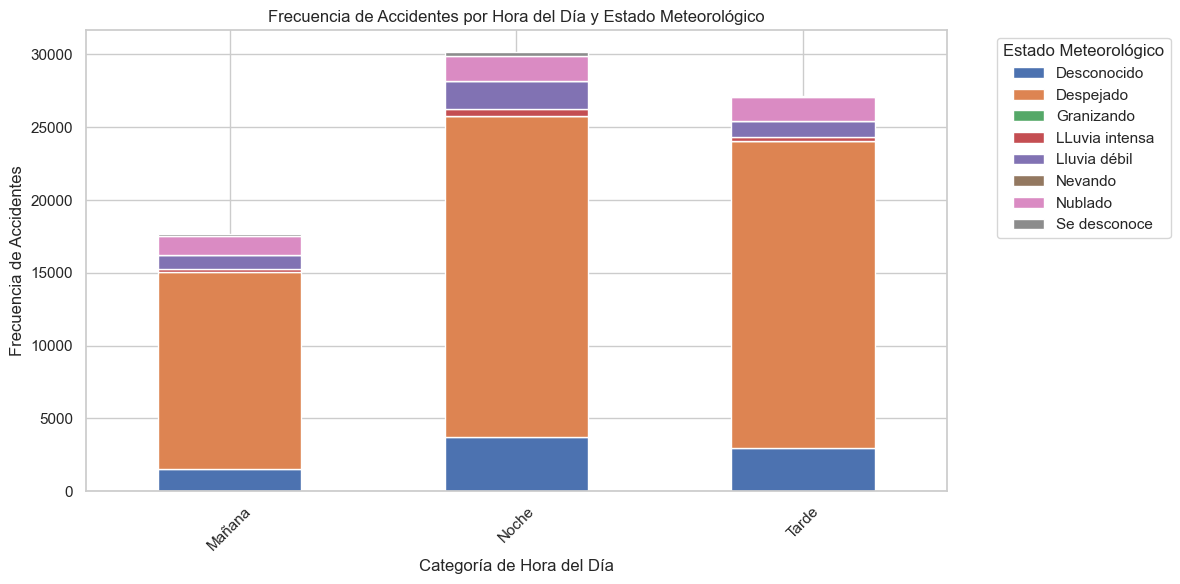

In [11]:
import seaborn as sns

# Configuración de estilo de gráfico
sns.set(style="whitegrid")

# Crear un gráfico de barras apiladas
accident_frequency.plot(kind='bar', stacked=True, figsize=(12, 6))

# Título y etiquetas
plt.title('Frecuencia de Accidentes por Hora del Día y Estado Meteorológico')
plt.xlabel('Categoría de Hora del Día')
plt.ylabel('Frecuencia de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Estado Meteorológico', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Tenemos información estimada sobre los días soleados nublados, nevados y con lluvia de Madrid. Con esta información vamos a intentar estimar la probabilidad relativa de sufrir un accidente en Madrid

In [69]:
combined_data[combined_data['estado_meteorológico']=='Despejado'].count() / combined_data.count()

num_expediente          0.755993
fecha                   0.755993
hora                    0.755993
localizacion            0.755993
numero                  0.755990
cod_distrito            0.755993
distrito                0.755993
tipo_accidente          0.755993
estado_meteorológico    0.755993
tipo_vehiculo           0.756168
tipo_persona            0.755993
rango_edad              0.755993
sexo                    0.755993
cod_lesividad           0.836300
lesividad               0.836300
coordenada_x_utm        0.742179
coordenada_y_utm        0.742179
positiva_alcohol        0.755993
positiva_droga          0.755993
numero_pasajeros        0.755993
fugado                  0.755993
categoria_hora          0.755993
marca_clase_edad        0.761502
year                    0.755993
month                   0.755993
dtype: float64

In [70]:
combined_data[combined_data['estado_meteorológico']=='Nublado'].count() / combined_data.count()

num_expediente          0.062072
fecha                   0.062072
hora                    0.062072
localizacion            0.062072
numero                  0.062073
cod_distrito            0.062072
distrito                0.062072
tipo_accidente          0.062072
estado_meteorológico    0.062072
tipo_vehiculo           0.062151
tipo_persona            0.062072
rango_edad              0.062072
sexo                    0.062072
cod_lesividad           0.068271
lesividad               0.068271
coordenada_x_utm        0.068278
coordenada_y_utm        0.068278
positiva_alcohol        0.062072
positiva_droga          0.062072
numero_pasajeros        0.062072
fugado                  0.062072
categoria_hora          0.062072
marca_clase_edad        0.063053
year                    0.062072
month                   0.062072
dtype: float64

Podemos observar que el 75.59% de los días del año son despejados, comparado con los dias Nublados, siendo estos solo el 6% de los dias del año. Lo que justifica que haya mayor cantidad de accidentes en estos momentos

# Distribución de las edades de las personas involucradas en distintos tipos de accidentes.

1. Transformamos los rangos de edad en marcas de clase (valores numéricos medios) para permitir cálculos estadísticos.
2. Agrupar los datos por tipo de accidente y calcular los percentiles para entender la distribución de la edad dentro de cada categoría de accidente.

In [33]:
# Crear un diccionario para mapear los rangos de edad a marcas de clase (valor medio)
age_range_to_midpoint = {
    'Menor de 5 años': 2.5,
    'De 6 a 9 años': 7.5,
    'De 10 a 14 años': 12.5,
    'De 15 a 17 años': 16,
    'De 18 a 20 años': 19,
    'De 21 a 24 años': 22.5,
    'De 25 a 29 años': 27,
    'De 30 a 34 años': 32,
    'De 35 a 39 años': 37,
    'De 40 a 44 años': 42,
    'De 45 a 49 años': 47,
    'De 50 a 54 años': 52,
    'De 55 a 59 años': 57,
    'De 60 a 64 años': 62,
    'De 65 a 69 años': 67,
    'De 70 a 74 años': 72,
    'Más de 74 años': 77,
    'Desconocido': np.nan  # Asignar NaN para los rangos de edad desconocidos
}

# Convertir los rangos de edad a marcas de clase
combined_data['marca_clase_edad'] = combined_data['rango_edad'].map(age_range_to_midpoint)

# Agrupar los datos por tipo de accidente y calcular los percentiles de edad
percentiles_age_by_accident_type = combined_data.groupby('tipo_accidente')['marca_clase_edad'].describe(percentiles=[.25, .5, .75])

percentiles_age_by_accident_type

,count,mean,std,min,25%,50%,75%,max
tipo_accidente,,,,,,,,
Alcance,16894.0,40.588079,15.014567,2.5,27.0,42.0,52.0,77.0
Atropello a animal,152.0,43.881579,14.313743,2.5,32.0,42.0,52.0,77.0
Atropello a persona,4969.0,43.699034,19.378701,2.5,27.0,42.0,57.0,77.0
Caída,4298.0,38.496859,14.336758,2.5,27.0,37.0,47.0,77.0
Choque contra obstáculo fijo,5893.0,40.396233,15.324864,2.5,27.0,42.0,52.0,77.0
Colisión frontal,1790.0,40.871788,15.219538,2.5,27.0,42.0,52.0,77.0
Colisión fronto-lateral,18357.0,40.539140,15.404111,2.5,27.0,42.0,52.0,77.0
Colisión lateral,10482.0,42.643246,14.474836,2.5,32.0,42.0,52.0,77.0
Colisión múltiple,3965.0,41.477806,15.382169,2.5,32.0,42.0,52.0,77.0


Creamos una visualización gráfica para interpretar de manera clara y efectiva la distribución de edades por tipo de accidente.

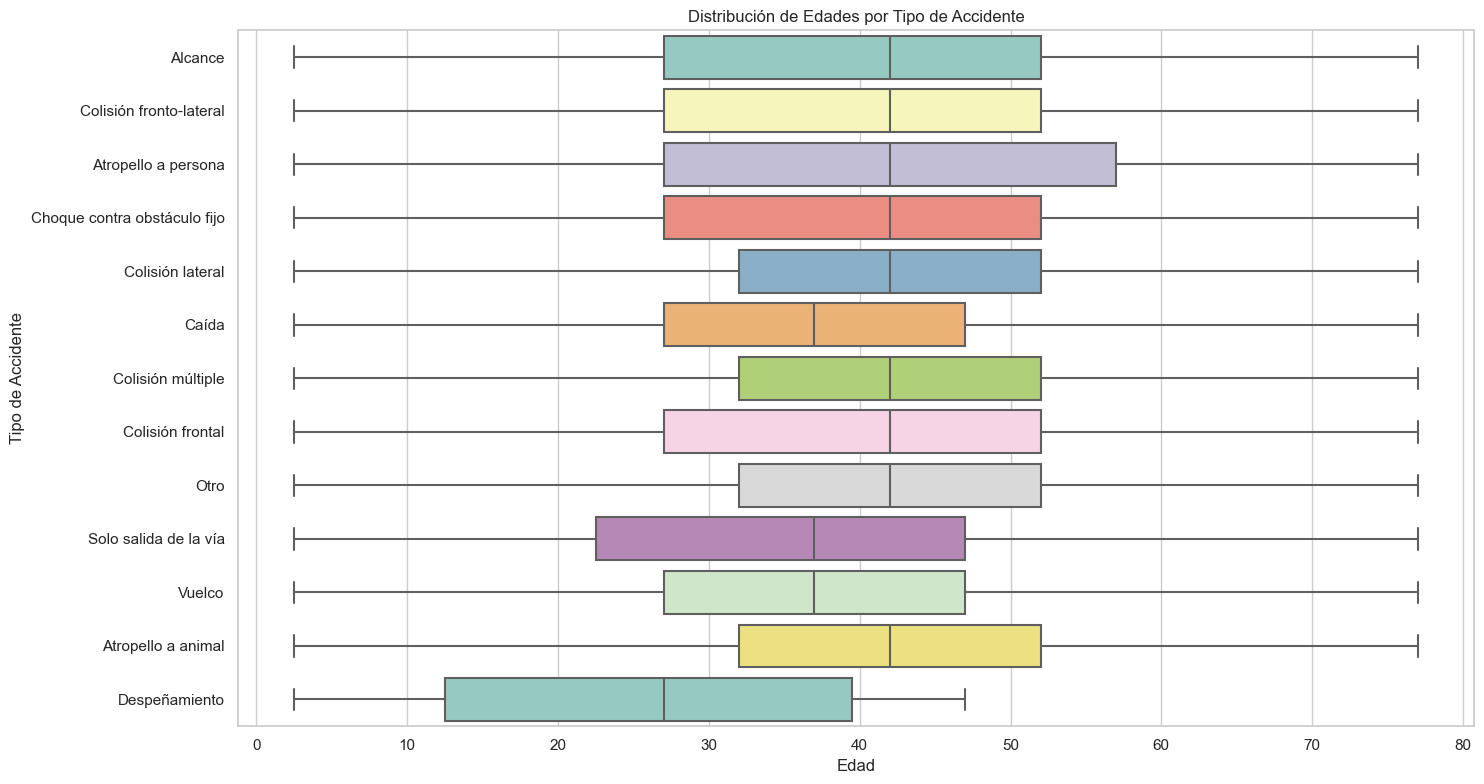

In [34]:
# Crear un gráfico de caja para visualizar la distribución de edades por tipo de accidente
plt.figure(figsize=(15, 8))
sns.boxplot(x='marca_clase_edad', y='tipo_accidente', data=combined_data, palette="Set3")

# Título y etiquetas
plt.title('Distribución de Edades por Tipo de Accidente')
plt.xlabel('Edad')
plt.ylabel('Tipo de Accidente')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El gráfico de caja que hemos creado revela diferencias significativas en la distribución de edades entre los distintos tipos de accidentes. Se observa que algunos tipos de accidentes, como los atropellos a personas, presentan una distribución de edades más amplia y una mediana más alta, lo que indica una mayor participación de individuos de edad avanzada en estos accidentes. Por otro lado, otros tipos de accidentes muestran una concentración más estrecha de edades, sugiriendo un grupo objetivo específico más susceptible

Del análisis de los datos de accidentes, centrado en la relación entre la edad de los individuos involucrados y los tipos de accidentes, se puede resumir en los siguientes puntos clave:

1. Diversidad en la Distribución de Edades: Observamos una variabilidad significativa en la distribución de edades entre los distintos tipos de accidentes. Esto indica que ciertos tipos de accidentes son más propensos a involucrar a grupos de edad específicos.

2. Mayor Involucramiento de Edades Avanzadas en Algunos Accidentes: En particular, tipos de accidentes como atropellos a personas mostraron una mayor participación de individuos de mayor edad, lo cual se evidenció por una mediana de edad más alta y un rango más amplio en la distribución de edades.

3. Concentración de Grupos de Edad en Accidentes Específicos: Algunos tipos de accidentes tenían una distribución de edades más concentrada, sugiriendo que ciertos grupos de edad son más susceptibles a estos accidentes específicos.

4. Importancia para la Prevención y Seguridad: Estos hallazgos son cruciales para diseñar estrategias de prevención y seguridad vial que sean específicas para diferentes grupos de edad, especialmente para aquellos más vulnerables a ciertos tipos de accidentes.

# Relación entre la ubicación de los accidentes (distritos específicos) y los tipos de accidentes que ocurren en esos lugares
Determinamos las categorías únicas existentes en las columnas 'distrito' y 'tipo_accidente' para comprender la variedad de datos con los que trabajaríamos.

In [35]:
# Revisar los valores únicos para las columnas 'distrito' y 'tipo_accidente'
unique_districts = combined_data['distrito'].unique()
unique_accident_types = combined_data['tipo_accidente'].unique()

unique_districts, unique_accident_types

(array(['PUENTE DE VALLECAS', 'RETIRO', 'CENTRO', 'SAN BLAS-CANILLEJAS',
        'USERA', 'CHAMBERÍ', 'MORATALAZ', 'LATINA', 'HORTALEZA',
        'ARGANZUELA', 'CARABANCHEL', 'TETUÁN', 'CIUDAD LINEAL',
        'VILLAVERDE', 'SALAMANCA', 'VICÁLVARO', 'FUENCARRAL-EL PARDO',
        'VILLA DE VALLECAS', 'CHAMARTÍN', 'MONCLOA-ARAVACA', 'BARAJAS'],
       dtype=object),
 array(['Alcance', 'Colisión fronto-lateral', 'Atropello a persona',
        'Choque contra obstáculo fijo', 'Colisión lateral', 'Caída',
        'Colisión múltiple', 'Colisión frontal', 'Otro',
        'Solo salida de la vía', 'Vuelco', 'Atropello a animal',
        'Despeñamiento'], dtype=object))

Normalizamos los datos para que las diferencias en el número total de accidentes por distrito no afecten el análisis y visualizar la relación mediante un mapa de calor.

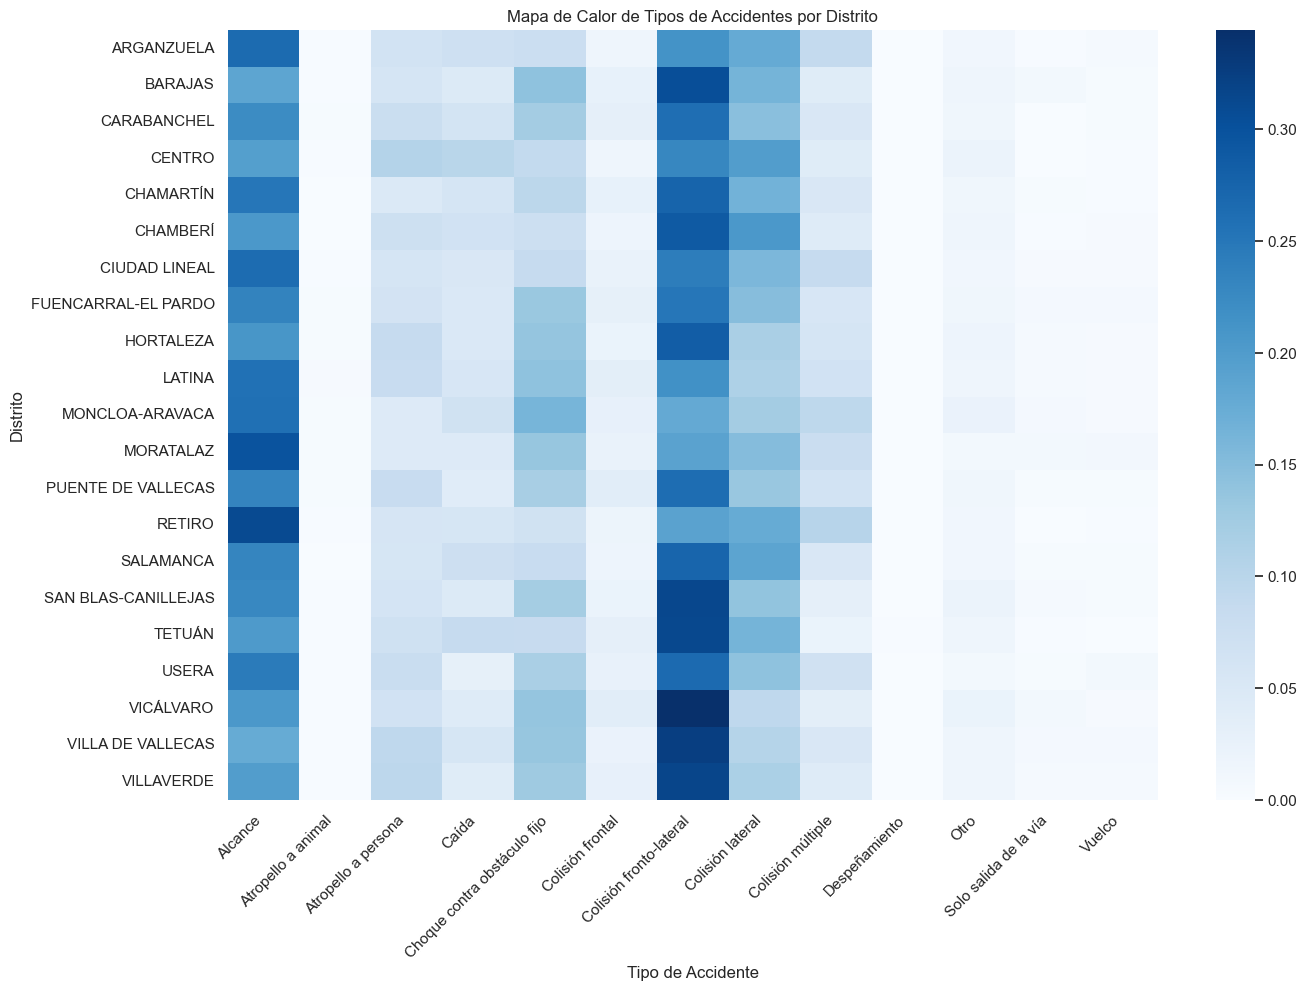

In [36]:
# Crear una tabla cruzada (crosstab) para contar la frecuencia de tipos de accidente por distrito
accident_type_by_district = pd.crosstab(combined_data['distrito'], combined_data['tipo_accidente'])

# Normalizar los datos para que las diferencias en el número total de accidentes por distrito no sesguen los resultados
accident_type_by_district_normalized = accident_type_by_district.div(accident_type_by_district.sum(axis=1), axis=0)

# Crear el mapa de calor con una paleta de colores adecuada para ambos modos (oscuro y claro)
plt.figure(figsize=(15, 10))
sns.heatmap(accident_type_by_district_normalized, annot=False, cmap='Blues')

# Título y etiquetas
plt.title('Mapa de Calor de Tipos de Accidentes por Distrito')
plt.xlabel('Tipo de Accidente')
plt.ylabel('Distrito')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

El mapa de calor que hemos creado muestra la frecuencia relativa de diferentes tipos de accidentes en cada distrito. A través de los gradientes de color, podemos observar patrones interesantes:

* **Patrones de Frecuencia**: Algunos distritos presentan una mayor frecuencia de ciertos tipos de accidentes en comparación con otros. Por ejemplo, un distrito puede mostrar una mayor incidencia de "Alcances" o "Colisiones laterales" en comparación con otros tipos de accidentes.

* **Distribución Geográfica**: La distribución de los tipos de accidentes no es uniforme a través de los distritos, indicando posibles factores geográficos o urbanísticos que influyen en el tipo de accidentes más comunes en cada área.

* **Detección de Hotspots**: El mapa ayuda a identificar 'hotspots' o áreas donde ciertos tipos de accidentes son particularmente frecuentes. Estos puntos calientes podrían requerir atención especial en términos de seguridad vial o medidas preventivas.

Este tipo de visualización es útil para una variedad de aplicaciones, especialmente en la planificación urbana, la gestión de la seguridad vial y en la toma de decisiones políticas:

* **Planificación Urbana y Mejoras en la Infraestructura**: Identificar áreas con alta incidencia de ciertos tipos de accidentes puede indicar la necesidad de mejoras en la infraestructura, como señalización mejorada, cambios en el diseño de las carreteras, o la implementación de medidas de calmado de tráfico.

* **Enfoque en la Seguridad Vial**: Permite a las autoridades locales y a las organizaciones de seguridad vial centrarse en áreas y tipos de accidentes específicos para campañas de concienciación y educación.

* **Asignación de Recursos**: Ayuda a los servicios de emergencia y a los planificadores urbanos a asignar recursos y servicios de manera más eficiente, concentrándose en las áreas con mayor frecuencia de tipos específicos de accidentes.

### Mapa de accidentes por distrito
Para facilitar la visualización y distribución de accidentes en Madrid, creamos un mapa de los accidentes señalado por distritos

Las columnas de coordenadas coordenada_x_utm y coordenada_y_utm están presentes en todos los registros, pero están en formato de objeto (probablemente debido a la presencia de comas como separadores decimales). Necesitamos convertir estas columnas a un formato numérico adecuado para poder utilizarlas en un mapa.

Realizamos la conversión de estas coordenadas y luego procederemos a crear un mapa que muestre los accidentes por distrito.

In [38]:
coord_columns_info = combined_data[['coordenada_x_utm', 'coordenada_y_utm']].info()

# Displaying the first few non-null coordinate values to understand their format
sample_coords = combined_data.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm']).head()[['coordenada_x_utm', 'coordenada_y_utm']]
sample_coords

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74961 entries, 0 to 74960
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coordenada_x_utm  74961 non-null  object
 1   coordenada_y_utm  74961 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


,coordenada_x_utm,coordenada_y_utm
0,"443359,226","4472082,272"
1,"443359,226","4472082,272"
2,"441155,351","4474129,588"
3,"441155,351","4474129,588"
4,"441155,351","4474129,588"


In [40]:
combined_data['coordenada_x_utm'] = pd.to_numeric(combined_data['coordenada_x_utm'].str.replace(',', '.'))
combined_data['coordenada_y_utm'] = pd.to_numeric(combined_data['coordenada_y_utm'].str.replace(',', '.'))

# Check
combined_data[['coordenada_x_utm', 'coordenada_y_utm']].info()


ValueError: Unable to parse string "#¡VALOR!" at position 757

Parece que hay un problema con la conversión de las coordenadas a formato numérico. Algunas entradas en las columnas de coordenadas contienen valores no numéricos, como "#¡VALOR!", lo que está causando un error.
Limpiamos los datos eliminando o reemplazando estos valores no numéricos. Luego intentaré nuevamente convertir las coordenadas a formato numérico. Vamos a proceder con este enfoque.

In [41]:
# Limpiando los valores no numéricos en las columnas de coordenadas y convirtiéndolos a numéricos
combined_data['coordenada_x_utm'] = pd.to_numeric(combined_data['coordenada_x_utm'].str.replace(',', '.').replace('#¡VALOR!', np.nan), errors='coerce')
combined_data['coordenada_y_utm'] = pd.to_numeric(combined_data['coordenada_y_utm'].str.replace(',', '.').replace('#¡VALOR!', np.nan), errors='coerce')

# Verificando si la conversión fue exitosa y contando los valores no nulos
converted_coords_info = combined_data[['coordenada_x_utm', 'coordenada_y_utm']].info()
non_null_coords_count = combined_data[['coordenada_x_utm', 'coordenada_y_utm']].notnull().sum()

converted_coords_info, non_null_coords_count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74961 entries, 0 to 74960
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coordenada_x_utm  65526 non-null  float64
 1   coordenada_y_utm  65526 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


(None,
 coordenada_x_utm    65526
 coordenada_y_utm    65526
 dtype: int64)

Para el mapa, utilizaremos las coordenadas UTM (Universal Transverse Mercator), que son adecuadas para representar datos a nivel local o regional. Vamos a crear un mapa que muestre la distribución de los accidentes en estos distritos

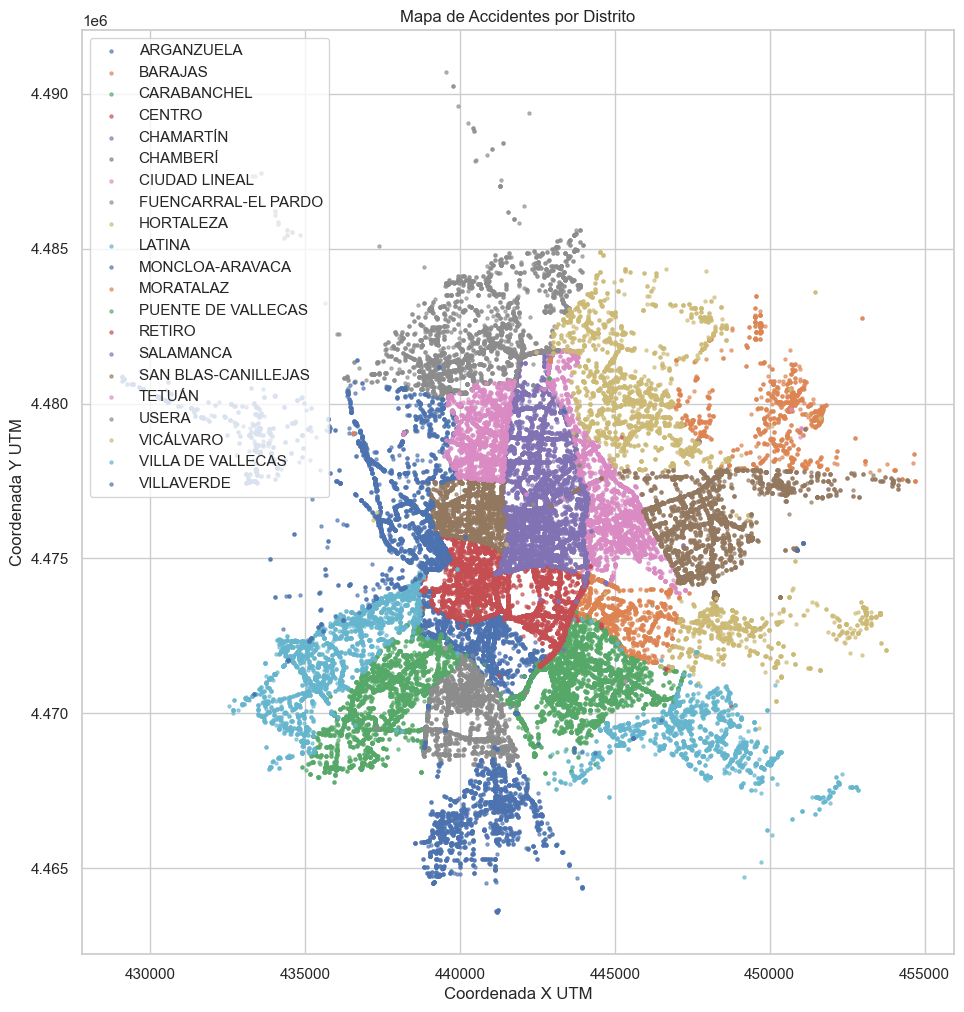

In [45]:
import geopandas as gpd
from shapely.geometry import Point

# Filtrando los datos para eliminar filas con coordenadas nulas
data_geo = combined_data.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm'])

# Creando objetos geométricos a partir de las coordenadas UTM
geometry = [Point(xy) for xy in zip(data_geo['coordenada_x_utm'], data_geo['coordenada_y_utm'])]
geo_df = gpd.GeoDataFrame(data_geo, geometry=geometry)
# Asignando colores diferentes a cada distrito
fig, ax = plt.subplots(figsize=(12, 12))
for distrito, df_distrito in geo_df.groupby('distrito'):
    df_distrito.plot(ax=ax, markersize=5, label=distrito, alpha=0.6)

ax.set_title("Mapa de Accidentes por Distrito")
ax.set_xlabel("Coordenada X UTM")
ax.set_ylabel("Coordenada Y UTM")
ax.legend()
plt.grid(True)
plt.show()


Para identificar los accidentes que ocurrieron en la autovía M-30, filtraremos los datos utilizando la columna 'localizacion' para seleccionar aquellos registros que mencionen "M-30". Esta aproximación asume que la columna 'localizacion' contiene referencias precisas a las ubicaciones de los accidentes.

In [47]:
# Filtrando los accidentes que ocurrieron en la autovía M-30
accidentes_m30 = combined_data[combined_data['localizacion'].str.contains("M-30", na=False)]

# Contando el número de accidentes en la M-30
num_accidentes_m30 = accidentes_m30.shape[0]
num_accidentes_m30

5919

Creamos el mapa sobre la base que ya habíamos obtenido, añadiendo los accidentes en la autovía M-30

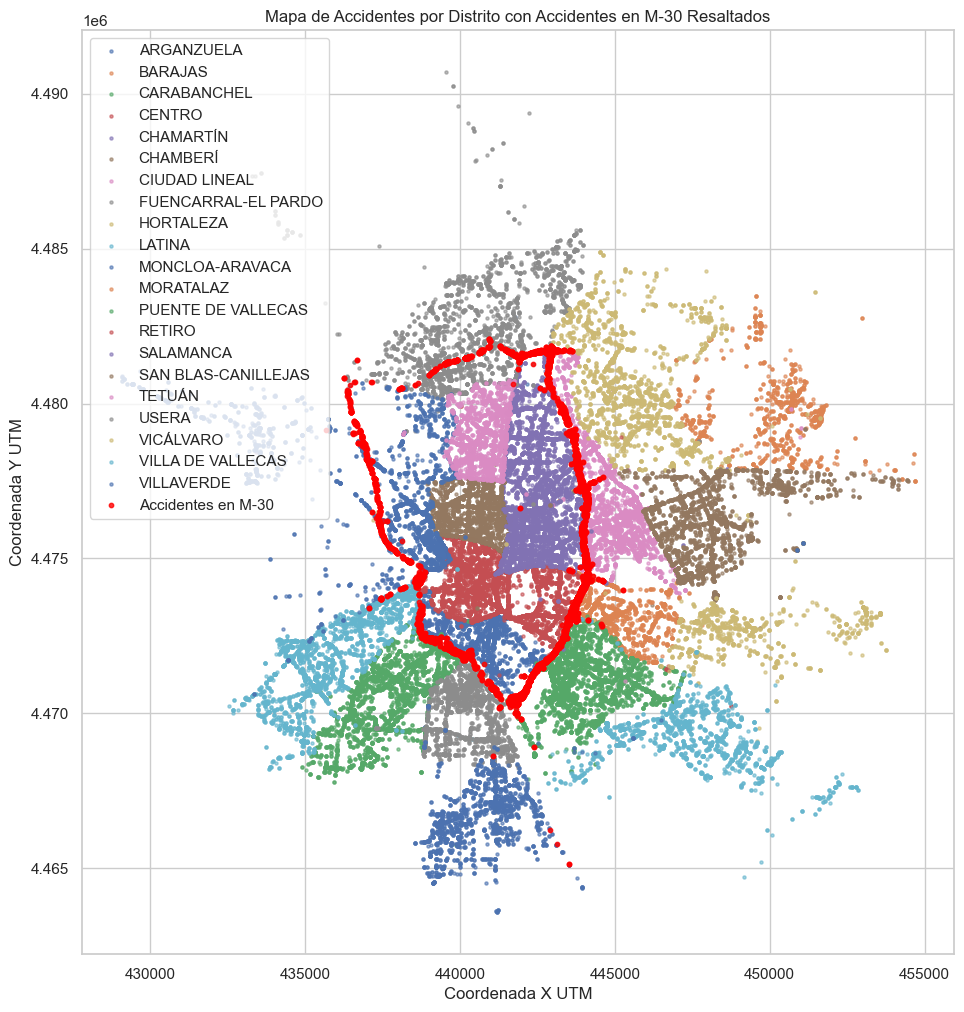

In [48]:
# Creando la geometría para los accidentes en la M-30
geometry_m30 = [Point(xy) for xy in zip(accidentes_m30['coordenada_x_utm'], accidentes_m30['coordenada_y_utm'])]
geo_df_m30 = gpd.GeoDataFrame(accidentes_m30, geometry=geometry_m30)

# Creando un nuevo mapa con la misma base y añadiendo los accidentes de la M-30 en rojo
fig, ax = plt.subplots(figsize=(12, 12))
for distrito, df_distrito in geo_df.groupby('distrito'):
    df_distrito.plot(ax=ax, markersize=5, label=distrito, alpha=0.6)

# Añadiendo los accidentes de la M-30
geo_df_m30.plot(ax=ax, markersize=10, color="red", label="Accidentes en M-30", alpha=0.8)

ax.set_title("Mapa de Accidentes por Distrito con Accidentes en M-30 Resaltados")
ax.set_xlabel("Coordenada X UTM")
ax.set_ylabel("Coordenada Y UTM")
ax.legend()
plt.grid(True)
plt.show()

### Desviación Estándar en Resultados de Pruebas de Alcohol vs. Gravedad del Accidente

Categorizamos la lesividad según:

**Leve:**
Asistencia sanitaria ambulatoria con posterioridad
Asistencia sanitaria sólo en el lugar del accidente
Atención en urgencias sin posterior ingreso
Sin asistencia sanitaria

**Moderada:**
Asistencia sanitaria inmediata en centro de salud o mutua
Ingreso inferior o igual a 24 hora

**Grave:**
Ingreso superior a 24 horas

**Fatal:**
Fallecido 24 horas

**Desconocido:**
Se desconoce
nan

In [43]:
# Mapeando los valores de lesividad a categorías de gravedad
def categorizar_lesividad(lesividad):
    categorias = {
        'Asistencia sanitaria ambulatoria con posterioridad': 'Leve',
        'Asistencia sanitaria sólo en el lugar del accidente': 'Leve',
        'Atención en urgencias sin posterior ingreso': 'Leve',
        'Sin asistencia sanitaria': 'Leve',
        'Asistencia sanitaria inmediata en centro de salud o mutua': 'Moderada',
        'Ingreso inferior o igual a 24 horas': 'Moderada',
        'Ingreso superior a 24 horas': 'Grave',
        'Fallecido 24 horas': 'Fatal',
        'Se desconoce': 'Desconocido',
        'nan': 'Desconocido'
    }
    return categorias.get(lesividad, 'Desconocido')

# Aplicando la transformación
combined_data['gravedad_accidente'] = combined_data['lesividad'].astype(str).apply(categorizar_lesividad)

# Calculando la desviación estándar de los resultados de las pruebas de alcohol por categoría de gravedad
std_alcohol_por_gravedad = combined_data.groupby('gravedad_accidente')['positiva_alcohol'].std()
std_alcohol_por_gravedad

gravedad_accidente
Desconocido    0.180604
Fatal          0.000000
Grave          0.194435
Leve           0.168641
Moderada       0.176793
Name: positiva_alcohol, dtype: float64

Estos resultados indican la variabilidad en los resultados de las pruebas de alcohol dentro de cada categoría de gravedad de accidente. Una desviación estándar de 0.0000 en la categoría "Fatal" sugiere que no hay variabilidad en los resultados de las pruebas de alcohol para esa categoría, lo que podría significar que hay pocos o ningún dato en esa categoría, o que todos los datos en esa categoría tienen el mismo valor.

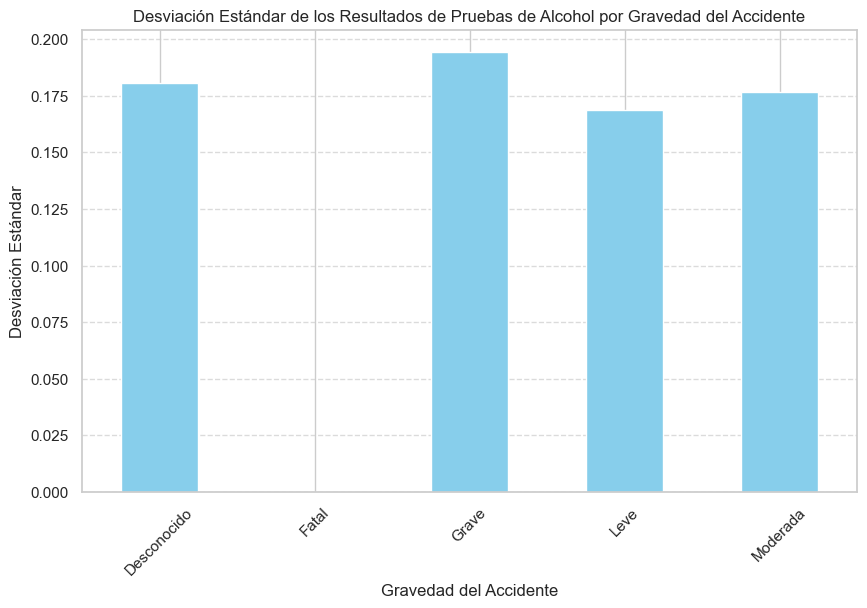

In [44]:
# Creando una gráfica de barras para la desviación estándar de los resultados de las pruebas de alcohol por gravedad
plt.figure(figsize=(10, 6))
std_alcohol_por_gravedad.plot(kind='bar', color='skyblue')
plt.title('Desviación Estándar de los Resultados de Pruebas de Alcohol por Gravedad del Accidente')
plt.xlabel('Gravedad del Accidente')
plt.ylabel('Desviación Estándar')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Basándonos en la gráfica y los análisis realizados, podemos concluir lo siguiente:

**Variabilidad en Resultados de Pruebas de Alcohol:**

La categoría de accidentes **"Grave"** muestra la mayor variabilidad en los resultados de las pruebas de alcohol, indicada por la desviación estándar más alta (0.1944). Esto sugiere una mayor diversidad en los niveles de alcohol entre los involucrados en accidentes graves.
Las categorías "Leve" y "Moderada" también muestran una variabilidad significativa, aunque ligeramente menor en comparación con la categoría "Grave".
Categoría Fatal:

La categoría **"Fatal"** tiene una desviación estándar de 0, lo que sugiere que no hay variabilidad en los resultados de las pruebas de alcohol para esta categoría. Sin embargo, al investigar más a fondo, encontramos que no hay casos de accidentes fatales con pruebas de alcohol positivas en el conjunto de datos.
Datos Desconocidos:

La categoría **"Desconocido"** tiene una desviación estándar de 0.1806. Aunque esta categoría contiene datos, la clasificación de la gravedad de los accidentes es incierta, lo que limita la interpretación específica en el contexto de la gravedad del accidente.
Consideraciones Generales:

Estas conclusiones deben interpretarse teniendo en cuenta la naturaleza y calidad de los datos disponibles. Es importante considerar que la ausencia de casos en ciertas categorías (como accidentes fatales con alcohol positivo) puede deberse a limitaciones en la recolección de datos o a la naturaleza misma de los accidentes reportados.

In [116]:
combined_data['positiva_alcohol'].value_counts()

0.0    72591
1.0     2370
Name: positiva_alcohol, dtype: int64

Pendiente analizar por breakdown en las zonas de puente de vallecas